In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

import os
import math as m 
import matplotlib.pyplot as plt
import matplotlib.colors as clr

C:\Users\sanaa mouzahir\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


### Data needed
- Creep test at different temperature for different ice content and different stress levels
- Relaxataion test at different temperatures for different ice content


### 1-D structure


### 1/ Define the 1-D element's structure: 
- Function for the coordinates 
- Function for node connectivity (Not really important for 1-D but so that we dont have to change the code much after 
- Function to define the type of blocade :Here embedded but easily changeable
- Function to plot a structure
***

In [2]:
positions=np.array([[0,0],[1,0]])
conn= np.array([[0, 1]])



In [3]:
def ComputeConnectivity1D(Lx,dx): 
    nx=int(Lx/dx)+1
    conn=np.zeros((nx-1,2))
    for i in range(nx-1):
         # Numéro de l'élément
        n1=i
        n2=i+1
        conn[i,:]=[n1,n2]
    return conn 
Conn=ComputeConnectivity1D(100,2)
ComputeConnectivity1D(10,10)

array([[0., 1.]])

In [4]:
def PlotStructure(Coordinates, Connectivity,
                   plot_eqn=None,
                   elem_colors=None, node_colors=None,
                   show_nodes=True,
                   show_node_indexes=True,
                   show_elems=True,
                   show_elem_indexes=True,
                   linestyle='-', ax=None,
                   ** kwargs):

    positions = np.array(Coordinates)
    conn = np.array(Connectivity)
    eqn_num_node = None

    if type(plot_eqn) == str:
        if plot_eqn == "packed":
            plot_eqn = packed_eqn
        else:
            raise RuntimeError("not known eqn packing strategy")
        eqn_num_node = eqn_number_node(plot_eqn, positions.shape[0])

    elif type(plot_eqn) == np.ndarray:
        eqn_num_node = plot_eqn
    else:
        if plot_eqn is not None:
            raise RuntimeError("could not get eqn " + str(type(plot_eqn)))

    if plot_eqn is not None:
        eqn_num_elem = eqn_number_elem(eqn_num_node, conn)

    _min, _max = compute_minmax(positions)
    _range = compute_range(positions)

    for i in range(2):
        if _range[i] == 0:
            _range[i] = .5

    if ax is None:
        fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim((_min[0]-_range[0].max()*0.2, _max[0]+_range[0].max()*0.2))
    ax.set_ylim((_min[1]-_range[1].max()*0.2, _max[1]+_range[1].max()*0.2))

    lines = []

    for i, e in enumerate(conn):
        p1 = positions[e[0]]
        p2 = positions[e[1]]
        lines.append((p1, p2))

    elem_colors = convert_colors(elem_colors)
    node_colors = convert_colors(node_colors)

    if elem_colors is not None:
        elem_colors = [pltcol.to_rgb(c) for c in elem_colors]

    if show_elems:
        lc = mc.LineCollection(lines, linewidths=2,
                               colors=elem_colors, linestyle=linestyle)
        ax.add_collection(lc)

    if show_nodes:
        disp_positions = ax.transData.transform(positions)
        node_size_px = compute_node_size(disp_positions)
        # print(node_size_px)
        ax.scatter(positions[:, 0], positions[:, 1], s=node_size_px**2,
                   c=node_colors)

    node_size = compute_node_size(positions)
    # print(node_size)

    # center_gravity = np.average(positions, axis=0)
    center_gravity = (_max+_min)/2
    # print(center_gravity)

    for i, p in enumerate(positions):
        _n = p - center_gravity
        norm = np.linalg.norm(_n)
        if norm < 1e-5:
            _n = np.array([1, 1])
        # print(norm, p, center_gravity,  _n)
        norm = _range.max()*.08/np.linalg.norm(_n)
        _n *= norm
        # print(p, _n)
        pos = p  # + _n
        # print('aaa', _range, p, pos, np.linalg.norm(_n))
        if show_nodes and show_node_indexes:
            ax.text(pos[0], pos[1], str(i), horizontalalignment='center',
                    verticalalignment='center')

        if plot_eqn is not None:
            eqns = eqn_num_node[i, :]
            ax.text(pos[0]+_n[0]*1.5, pos[1]+_n[1]*1.5,
                    "[" + ",".join([str(int(e)) for e in eqns]) + "]",
                    horizontalalignment='center')

    for i, e in enumerate(conn):
        p1 = positions[e[0]]
        p2 = positions[e[1]]
        center = (p1 + p2)/2
        _l = np.zeros(3)
        _l[:2] = p2 - p1
        _l /= np.linalg.norm(_l)
        _n = np.cross(_l, [0, 0, 1])
        # print(_n, node_size)
        center += _n[:2]*node_size*1.5
        if show_elems and show_elem_indexes:
            ax.text(center[0], center[1], f"({str(i)})",
                    horizontalalignment='center')

    ret = {}

    if plot_eqn is not None:
        ret['eqn_node'] = np.array(eqn_num_node, dtype=int)
        ret['eqn_elem'] = np.array(eqn_num_elem, dtype=int)
    else:
        return None

    return ret



In [5]:
def ComputeBlocades1D(Lx,Ly,dx,dy):
    
    if type(dx)==np.array: #if dx and dy are not cst
        nx=dx.shape[0]+1
        ny=dy.shape[0]+1
    elif type(dx)==int:
        nx=int(Lx/dx)+1
        ny=int(Ly/dx)+1
    if dy>0:
        blocades = np.zeros(((nx)*(ny), 2), dtype=bool)
    else: 
        blocades=np.zeros((nx,1),dtype=bool)
    if dy>0:
        for j in range(ny):
            blocades[0+(nx)*j , :] = True
    else: 
        blocades[0,:]=True
    return blocades.ravel()
Blocades=ComputeBlocades1D(10,0,10,0)
def plot_matrix(matrix,matrixname):
    mh.print_latex(matrixname+"= {0}", Matrix(matrix))
conn=np.array([[0,1]])
U=np.array([[0,6]])


### 2-D structure

In [6]:
def ComputeCoordinates2D(dx,dy):
    nx=dx.shape[0]+1
    ny=dy.shape[0]+1
    
    coordy=0
    coordinates = np.zeros(((nx)*(ny), 2))
    for j in range(ny):
        coordx=0
        for i in range(nx):
            n = i + j*(nx)
            coordinates[n, :] = [coordx, coordy]
            if i <dx.shape[0]:
                coordx+=dx[i]
        if j < dy.shape[0]:
            coordy+=dy[j]
    return coordinates

In [7]:
def ComputeConnectivity2D(dx, dy):
    nx=dx.shape[0]
    ny=dy.shape[0]
    
    conn = np.zeros((2*nx*ny, 3), dtype=int)
    for i in range(nx):
        for j in range(ny):
            n  = j*nx + i      
            n1 = j*(nx+1) + i  
            n2 = n1 + 1        
            n3 = n1 + (nx+1)   
            n4 = n3 + 1        
        
           
            conn[n, :] = [n1, n2, n4];       
            conn[n+nx*ny, :] = [n1, n4, n3]  
    return conn

In [8]:
def NumberEquations2D(conn):
    n_elem  = conn.shape[0]
    n_nodes_per_elem = conn.shape[1]
    numEquation = np.zeros((n_elem, 2*n_nodes_per_elem), dtype=int)
    for e in range(n_elem):
        for i in range(n_nodes_per_elem):
            numEquation[e, 2*i]   = 2*conn[e, i];
            numEquation[e, 2*i+1] = 2*conn[e, i]+1;
    return numEquation

In [9]:
def ComputeBlocades2D(dx,dy):
    nx=dx.shape[0]+1
    ny=dy.shape[0]+1
    # On connait à l'avance le nombre de ddl bloqués
    blocades = np.zeros(((nx)*(ny), 2), dtype=bool)
    for j in range(ny):
        # On bloque les degrés de liberté correspondants
        blocades[0+(nx)*j , :] = True
        
    return blocades.ravel()

- Constant stress1D: Applies constant stress at both ends of the bar --->Creep test
- ConstantDisplacement1D: Applies constant displacement at both ends of thebar---> Relaxation test
- Constrain strain rate--> Applies constant strainRate at the right end of the bad: Linearly increasing load


 1-D Functions
----

In [10]:
def ConstantStress1D(f,Lx,dx):
    nx=int(Lx/dx)+1
    Constant_stress=np.zeros((nx,1))
   
    Constant_stress[0]=f
    Constant_stress[nx-1]=f
    return Constant_stress

def Constantdisplacement1D(u0,Lx,dx): 
    nx=int(Lx/dx)+1
    Initial_displacement=np.zeros((nx,1))
    Initial_displacement[0]=u0
    Initial_displacement[nx-1]=u0
    return Initial_displacement
 
def ConstantStrainRate1D(edot0,Lx,dx): 
    nx=int(Lx/dx)+1
    Initial_StrainRate=np.zeros((nx,1))
    Initial_StrainRate[nx-1]=edot0
    return Initial_StrainRate

U_const=Constantdisplacement1D(6,20,20) 


### Mathematical formulation of the simulated creepstrain
- 1/Relaxation time that we found for any stress level that we impose for the creep test
- 2/Determine the constant parameters of the equation to determine creep strain
- 3/ Determine the non linear parameters of the equation to determine creep strain


In [11]:
def RelaxationTime(t0,tf,nsteps,Sigma): #Sigma is constant the whole time and then drops at ta
    
    t=np.linspace(t0,tf,int(tf/nsteps)+1)
    fig,ax=plt.subplots()
    ax.plot(Sigma,t)
    ax.set_xlabel('Time')
    ax.set_ylabel('Stress sigma')#With this we find the relaxation time
    idx=np.where(Sigma.any()==0)#Index of the relaxation time: When the stress drops
    return ax,idx


def ConstantParameters(ta,t0,tf,RecoveryStrain,nf,dt): #Constant parameters to model the strain
    
    """
    Strain represents the transient strain, ammount that the data needs to be shiffted with, (the linear recovery
data must be shifted downward on a log scale to match the curve with the
proper exponent and is equivalent to the transient creep strain at t1 for the
same stress level in the linear range., REF 151
    """
    n=np.linspace(0,nf,10)
    t=np.linspace(t0,tf,int(tf/dt)+1)
    lambd=t*(1-ta)/ta
    
    
    
    def StrainVSLambda(lambd,ni):
        Strain=np.float_power((1+lambd),ni,dtype=np.float64)-np.float_power(lambd,ni,dtype=np.float64)
        return Strain
    
    for i in range(len(n)):
        plt.plot(lambd,StrainVSLambda(lambd,n[i]))
     
    plt.plot(lambd,RecoveryStrain,'r')
    plt.set_xlabel('Lamda=t*(1-ta)/ta')            
    plt.set_ylabel('Recovery strain')     #REF 151
    plt.show()
    return  ax       
    

def NonLinearParameters(t0,alpha,ta1,ta2,n1,n2,Strain1,Strain2,Sigma1,Sigma2,RecoveryStrain): #2 strain curves, one for the first stress level and one for the second stress level
    e0=0
    e1=0
    g0=0
    g1=0
    g2=0
    a= 0
    A=g1*g2/a**n2                  
    t1=alpha[0]*t0 #More than five time the initial time  
    t2=alpha[1]*t0 #Initialisation of the parameters that we want for equation  10.66 REF 151 P 362              
    LHS=np.array([[1,ta1**n1],[1,ta2**n2]])
    RHS=np.array([Strain[ta1],Strain[ta2]])                
    e0,e1=np.lianalg.solve(LHS,RHS)
    D01=Sigma1*e0 #Parameter D0 for first stress level
    D11=Sigma1*e1 #Parameter D1 for second stress levl
    D02=Sigma2*e0 #Parameter D0 for second stress level
    D12=Sigma2*e1 #Parameter D1 for second stress level
    D0=np.mean(D01,D02)
    D1=np.mean(D11,D12)
    LHS=np.array([Strain1[t1],Strain1[t2]])
    RHS=np.array([[D0,D1*t1**n1],[D0,D1*t2*n2]])
    g0,A=np.linalg.solve(LHS,RHS) #Now we have D1,D0,g0, We still need  g1,g2 and a
    return D0,D1,g0,A
                  
                      
                      
def ComputeStrainSimCreep(t0,tf,nsteps,SigmaExp,g0,D0,D1,A,n):
    t=np.linspace(t0,tf,tf/nsteps)                  #P 362 REF 151
    SigmaCreep=(g0*D0+D1*A*t**n)*SigmaExp[0]
    return StrainCreep
t0=0
tf=1000
nsteps=10

sigma_test=np.ones((int(tf/nsteps)+1,1))* 10
sigma_test[sigma_test.shape[0]-1]=0


### Mathematical formulation of the sigma 
- 1/ Elastic part of sigma, 1D and 2D
- 2/ Deviatoric part of sigma 1D and 2D
- 3/Parameter calibration of G

In [12]:
def ComputeSigmaElSim(E,nu,StrainSim,dim):
    if dim==0:
        tr=1 #if we are working in 1-D
    else:
        tr=np.trace(strain) #if we are working in 2-D
        

    if dim==1:
        SigmaEl=(1/3)*tr*(E/(1-2*nu))*np.ones((StrainSim.shape[0],StrainSim.shape[1]))
    else:
        SigmaEl=(1/3)*tr*(E/(1-2*nu))*np.eye(StrainSim.shape[0],Strain.shape[1]) #If we are working in 2-D
    
    return SigmaEl



In [13]:
def ComputeSigmadevSim(G0,strain,mu,lambd,dt,tf,dim): 
    N=int(tf/dt)
    G=ComputeG(G0,dt,tf,mu,lambd)
    if dim==1:
        straindev=strain #if we are in 1-D, at everytime step sigma and epsilon are scalars, the final epsilon is an vector
    else:
        straindev=strain-(1/3)*np.trace(strain)*np.eye(strain.shape[0],strain.shape[1])
    t=np.linspace(0,tf,N+1) 
    s=t.shape[0] #if we are in 2D, at everytime step, sigma and epsilon are matrices, or vectors, the final epsilon/sigma are big matrices
    if dim==1:
        hm=np.zeros(strain.shape)
        sigmadev=np.zeros(strain.shape)
        dhm=np.zeros(strain.shape)
    else:
        hm=np.zeros((strain.shape[0],strain.shape[1]))
        sigmadev=np.zeros((strain.shape[0],strain.shape[1]))
        dhm=np.zeros((strain.shape[0],strain.shape[0]))#Strain va etre une grosse matrice ou les matrices 2*2 sont sockees a chaque pas de temps
    if dim==1:
        for i in range(2,s):
            
            dhm[i]=((straindev[i]-straindev[i-1])*lambd/dt)*(1-exp(-dt/lambd))    #dt is the difference between tm and tm-1
            hm[i]=(((straindev[i-1]-straindev[0])*lambd/t[i-1])*(1-exp(-t[i-1]/lambd)))*exp(-dt/lambd)+dhm[i]
            sigmadev[i]=2*G[i]*(mu*straindev[i]+mu*straindev[0]+mu*exp(-t[i]/lambd))*straindev[0]+hm[i]
    else:
        for i in range(2,s-2):
            for j in range(1,4):                
                hm[i:i+1,j:j+1]=((straindev[i-1:i,j-1:j]-straindev[0:1,0:1])*lambd/t[i-1])*(1-exp(t[i-1]/lambd))*(straindev[i-1:i,j-1:j]-straindev[0])
                dhm[i+1:i+2,j+1:j+2]=((straindev[i+1:i+2,j:j+1]-straindev[i+1:i+2])*lambd/dt)*(1-exp(-dt/lambd))*(straindev[i+1:i+2]-straindev[i+1:i+2])#dt is the difference between tm and tm-1
                hm[i+1:i+2,j+1:j+2]=hm[i:i+1,j:j+1]*exp(-dt/lamd)+dhm[i+1:i+2,j+1:j+2]
                sigmadev[i+1:i+2,j+1:j+2]=2*G*(mu*straindev[i+1:i+2,j+1:j+2]+u*straindev[0:1,0:1]+mu*exp(-t[i]/lambd))*straindev[0:1,0:1]+hm[i+1:i+2,j+1:j+2]
                
    return sigmadev







### Material parameters calibration
- Non linear least squares
- Brute force 

In [14]:
def CaliberParameters(lambda0,mu0,t,SigmaExp): 
    SigmaSim_start=ComputeSigmadevSim(G0,strain,mu,lambd,dt,tf,dim)
    

### Mathematical formulation of the StrainRate

In [15]:
def StrainRateSim(SigmaExp,StrainRateExp,T,i,w,n,dim):
    """
    wi is the ice content, We have a range of ice volumetric content for which wehave data, but the w that is given 
    to this function is  a constant,, if afterwards we want to plot some relationship between A and 
    
    T is a range oftmperatures pre defined befor the experiment and for 
    which we have data
    Paper used: file:///C:/Users/sanaa%20mouzahir/Downloads/Mathematical_descriptions_for_the_behaviour_of_ice.pdf
    """
    #Plusieurs palliers de temperature: Pour chaque temperature, un b, un N 
    #Plusieurs palliers de ice content, pour chaque ice contnt,un b, un N 
    #i: numero de la temperature utilisee 
    if dim==1: 
        SigmaExp=SigmaExp
    else: 
        SigmaExp=SigmaExp-1/3*np.trace(SigmaExp)
        
    Atest=StrainRateExp/np.float_power(SigmaExp,n,dtype=np.float64)
    b=log(5*(10**-11)*exp(-10.2*exp(w)))   
    a=(1+T[i])*np.log(Atest)-b
    T_space=np.linspace(T[0],T[len(T)],StrainRateExp.shape[0])
    X=1/(1+T)
    
    
    """
    b=np.zeros(len(w))
    for i in range(len(w)):
        b[i]=log(5*10**-11*exp(-10.2*w[i]))
    """
     #For each pallier of temperatur  
    def ASim(T):
        A= np.exp(a/(T+1))+b
        return A          
    B=np.float_power(SigmaExp,n,dtype=np.float64)                    
    StrainRateSim=ASim(T_space)@B
    return StrainRateSim                    
                
                
                              
    
    

In [16]:
def plots(StrainCreepExp,SigmaCreepExp,StrainCreepSim,SigmaCreepSim,t0,tf,dt,StrainRateExp):
    fig1,ax1=plt.subplots
    t=np.linspace(t0,tf,tf/dt)
    ax1.plt(t,StrainCreepExp)
    ax1.plt(t,StrainCreepSim)
    plt.set_xlabel()
    plt.set_ylabel()
    plt.show()
    fig2,ax2=plt.subplots
    ax2.plt(StrainCreepExp,SigmaCreepExp)
    ax2.plt(StrainCreepSim,SigmaCreepSim)
    plt.show()
   
    
    return ax1,ax2


### Sources 
- 1/ file:///C:/Users/sanaa%20mouzahir/Downloads/Mathematical_descriptions_for_the_behaviour_of_ice.pdf
- 2 / file:///C:/Users/sanaa%20mouzahir/Downloads/Cours%20Ba6/Master%20Computational%20and%20data-driven%20engineering%20mechanics/Modelling%20of%20frcture%20of%20ice%20sheets%20on%20parallel%20computers/First%20week%20of%20research/Papers/Dissertation.pdf
- 3 file:///C:/Users/sanaa%20mouzahir/Downloads/1-s2.0-S0167663611002122-main.pdf



### Finite element part


In [17]:
def FiniteElement1D(x,nodes,l):
    N1s=-1/(2*l)
    N2s=1/(2*l)
    C = np.array([N1s,N2s])
    J = l/2
    B=(1/J)*np.array([[N1s,N2s]])
    return B,J
coord=np.array([0,1])
B,J=FiniteElement1D(0,coord,1)  


In [18]:
  
def ComputeK2D(quad,weights,connectivity, coord,D): #triangle
    nodes = coord[connectivity.ravel(), :] 
    K_local = np.zeros((6, 6)) 
    for x_q, w_q in zip(quads, weights):
        B, J = FiniteElement(x_q, nodes)  
        #detJ = abs(np.linalg.det(J) )         
        K_local = K_local + w_q * B@B.T *np.det(J)  
    return K_local

def ComputeK1D(quads,weights,coord,D,l):#For 1 element 
    nodes=coord
    K_local=np.zeros((2,2))
    B,J=FiniteElement1D(quads,nodes,l)
    K_local=K_local+weights*B.T@B*J
    K_local=K_local*D
    return K_local 




In [63]:
def ViscoElasticSolution1D(t,u0,G0,dt,tf,tol,F_ext,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades):
    K_modulus=E/(3*(1-2*nu)) #Bulk modulus: not time dependant
    U=np.zeros((len(t),2)) #Big Matrix: each row is the displacement at each node at time t
    if type(u0)==float:
        U[:,1]=u0 #First row--> First displacement (if we impose a displacement this row is non zero)
    else: 
        U[:,1]=u0[0]
    G=np.zeros((len(t),1)) #Vector of G where at each time step we have a new G as G is time dependent
    D=np.zeros((len(t),1))
    G[0]=G0 #Given in the paper
    lambd_lamé=np.zeros((len(t),1)) #Lamé coefficient--> Going to appear in our constitutive model, time dependant
    lambd_lamé[0]=K_modulus-(2/3)*G[0]#constitutive model, time dependent 
    K=ComputeK1D(quads,weights,nodes,D[0],l)
    D[0]=lambd_lamé[0]+2*G[0] #initial constitutive model
    B,J=FiniteElement1D(quads,nodes,l) #Matrix B and jacobian with gauss points
    Strain=np.zeros((len(t),1)) #at each time t we have a new strain because we have a new displacement
    Strain[0]=B@U[0,:] #Initial strain
    Sigma=np.zeros((len(t),1))
    Sigma[0]=D[0]*Strain[0]
    free = np.logical_not(blocades).ravel()
    for i in range(1,len(t)):
        
        G[i]=G0*((1-mu)+mu*np.exp(-t[i]/lambd))
        lambd_lamé[i]=K_modulus-(2/3)*G[i] #update lamé coef
        D[i]=lambd_lamé[i]+2*G[i] 
        K=ComputeK1D(quads,weights,nodes,D[i],l) #update matrix K at time t
        if U[0,1]==0: #if no displacement is imposed
            U[i,free]=np.linalg.solve(K[free,:][:, free],F_ext[i,free])
            Strain[i]=B@U[i,:]
        elif U[0,1]>0:# if we impose a constant deplacement
            if u0.shape[0]>2: # if we impose a time variable displacement
                U[i,free]=u0[i,1]
                Strain[i]=B@U[i,:]
            else:
                U[i,free]=U[0,1]
                Strain[i]=B@U[i,:]
                Sigma[i]=D[i]*Strain[i]
        
    
    return G,D,U,K,Strain,Sigma
            
            
            
        
        
        

        
    
    

In [20]:
#Test
path=os.getcwd()+'/StrainVStime.txt' #0.64
data1=pd.read_csv(path,header=None,delimiter=' ',names=['time','Strain'])
X1=data1['time']
Y1=data1['Strain']
path2=os.getcwd()+'/StrainVstime2.txt' #0.82
data2=pd.read_csv(path2,header=None,delimiter=' ',names=['time','Strain'])
X2=data2['time']
Y2=data2['Strain']
path3=os.getcwd()+'/StrainVStime3.txt' #0.93
data3=pd.read_csv(path3,header=None,delimiter=' ',names=['time','Strain'])
X3=data3['time']
Y3=data3['Strain']
fig,ax=plt.subplots()
ax.scatter(X1,Y1,label='0.64 MPa')
ax.scatter(X2,Y2,label='0.82 Mpa')
ax.scatter(X3,Y3,label='0.93 Mpa')
ax.set_xlabel('Time in h')
ax.set_ylabel('Strain')
ax.legend()
plt.tight_layout()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sanaa mouzahir\\Numerical modelling of fracture in ice sheets/StrainVStime.txt'

 ## Relaxation test: Constant displacement: Only  1 1-D element with unit length and unit area

## Creep test : Constant force at the end of the bar left side embedded

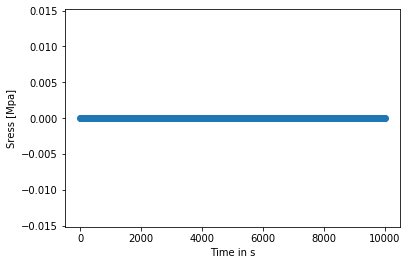

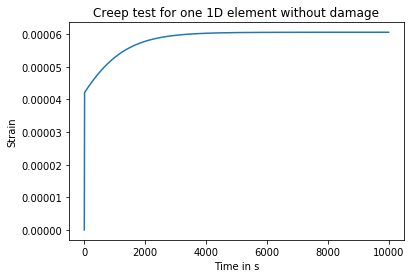

In [64]:
#test 
G0=3518.52*10**6
u0=np.array([0,0])
dt=10 #s
tf=10000 #s
tol=10**-2
niter=10000     
l=1 #Lengh of the bar
nodes=np.array([0,1])*l
mu=9.99/10
nu=0.35
E=9500*10**6
A=1
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext2=np.zeros((len(t),2))
F_ext2[:,1]=0.64*10**6
blocades=np.zeros((2,1),dtype=bool)
blocades[0]=True
blocades[1]=False
G,D,U,K,Strain,Sigma=ViscoElasticSolution1D(t,u0,G0,dt,tf,tol,F_ext2,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades)
fig,ax=plt.subplots()
ax.scatter(t,Sigma/10**6)
plt.tight_layout
ax.set_xlabel('Time in s')
ax.set_ylabel('Sress [Mpa]')
plt.savefig('Creep_test_1D_noDamage_stress.jpg')
plt.show()

fig,ax2=plt.subplots()
ax2.plot(t,Strain)
plt.tight_layout
ax2.set_xlabel('Time in s')
ax2.set_ylabel('Strain')
plt.title('Creep test for one 1D element without damage')
plt.savefig('CreepTEST_1D_NODAMAGE')
plt.show()



## Relaxation test: Constant displacement at the end of the bar, left side embedded 

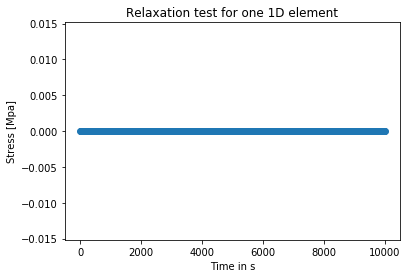

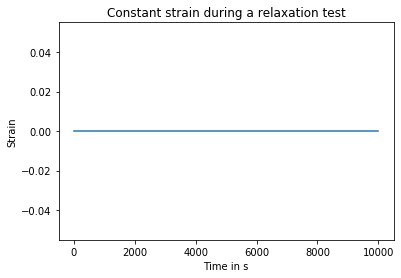

In [65]:
#test 
G0=3518.52*10**6
u0=np.array([0,6*10**-4])
dt=10 #s
tf=10000 #s
tol=10**-2
niter=10000     
l=1 
nodes=np.array([0,1])*l
mu=9.99/10
nu=0.35
E=9500*10**6
A=1
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext2=np.zeros((len(t),2))
blocades=np.zeros((2,1),dtype=bool)
blocades[0]=True
blocades[1]=False
G,D,U,K,Strain,Sigma=ViscoElasticSolution1D(t,u0,G0,dt,tf,tol,F_ext2,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades)
fig,ax=plt.subplots()
ax.scatter(t,Sigma)
plt.tight_layout
ax.set_xlabel('Time in s')
ax.set_ylabel('Stress [Mpa]')
plt.title('Relaxation test for one 1D element')
plt.savefig('Relaxation_1D_Nodamage_1ELEMENTStress.jpg')
plt.show()
fig,ax2=plt.subplots()
ax2.plot(t,Strain)
plt.tight_layout
ax2.set_xlabel('Time in s')
ax2.set_ylabel('Strain')
plt.title('Constant strain during a relaxation test')
plt.savefig('Relaxation_1D_Nodamage_1ELEMENT.jpg')


In [66]:

import sys
def miror(array):
    M=np.zeros(len(array))
    for i in range(len(array)):
        M[len(array)-i-1]=array[i]
    return M


In [67]:
#MN
dt=10
tf=100#s
t=np.linspace(1,tf,int(tf/dt))
def ciclicU(t,b,a):
    U=np.zeros(len(t))
    while k<a:
        for i in range(len(U)):
            U[i]=b
    b=b
            
            
    return U

    
    
    
def ComputeG(t,u,G0,mu,lambd):
    G=np.zeros(len(t))
    G[0]=G0
    index_trac=0
    index_comp=0
    for i in range(len(u)-1):  
        if u[i]>0:
            index_trac+=1
        else: 
            index_comp+=1
        G[i]=G0*((1-mu)+mu*np.exp(-t[index_trac-index_comp]/lambd))
                
        
    return G


## Sinusoidal displacement at the end of the element


In [68]:
def ViscoElasticSolution1DSIN(t,u0,G0,G,dt,tf,tol,F_ext,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades):
    K_modulus=E/(3*(1-2*nu)) #Bulk modulus: not time dependant
    U=np.zeros((len(t),2)) #Big Matrix: each row is the displacement at each node at time t
    if type(u0)==float:
        U[:,1]=u0 #First row--> First displacement (if we impose a displacement this row is non zero)
    else: 
        U[:,1]=u0[0]
     #Vector of G where at each time step we have a new G as G is time dependent
    D=np.zeros((len(t),1))
    lambd_lamé=np.zeros((len(t),1)) #Lamé coefficient--> Going to appear in our constitutive model, time dependant
    lambd_lamé[0]=K_modulus-(2/3)*G[0]#constitutive model, time dependent 
    D[0]=lambd_lamé[0]+2*G[0]
    K=ComputeK1D(quads,weights,nodes,D[0],l)
    B,J=FiniteElement1D(quads,nodes,l) #Matrix B and jacobian with gauss points
    Strain=np.zeros((len(t),1)) #at each time t we have a new strain because we have a new displacement
    Strain[0]=B@U[0,:] #Initial strain
    Sigma=np.zeros((len(t),1))
    
    if F_ext[0,1]>0:
        Sigma[0]=F_ext[0,1]/A
    else: 
        Sigma[0]=D[0]*Strain[0]
 
    free = np.logical_not(blocades).ravel()
    for i in range(1,len(t)):
        
        lambd_lamé[i]=K_modulus-(2/3)*G[i] #update lamé coef
        D[i]=lambd_lamé[i]+2*G[i] 
        K=ComputeK1D(quads,weights,nodes,D[i],l) #update matrix K at time t
        if U[0,1]==0: #if no displacement is imposed
            U[i,free]=np.linalg.solve(K[free,:][:, free],F_ext[i,free])
            Strain[i]=B@U[i,:]
        elif U[0,1]>0:# if we impose a constant deplacement
            if type(u0)==float:
                U[i,free]=u0
                Strain[i]=B@U[i,:]
            else:
                U[i,free]=u0[i]
                Strain[i]=B@U[i,:]
        
        
            
        if F_ext[i,1]>0:
            Sigma[i]=F_ext[i,1]/A
        else:
            Sigma[i]=D[i]*Strain[i]
        
    
    return D,U,K,Strain,Sigma


In [25]:
dt=10#s
tf=1000 #s
t=np.linspace(1,tf,int(tf/dt))


## High frequency, without change of amplitude

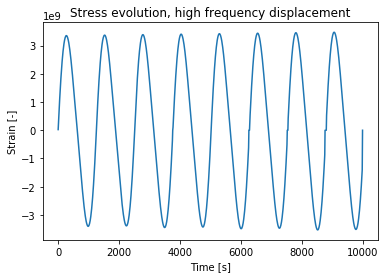

In [26]:
G0=3518520000.0
dt=10#s
tf=10000 #s
t=np.linspace(1,tf,int(tf/dt))
u0=np.sin(t/200)
G=np.array(ComputeG(t,u0,G0,mu,lambd))
l=1 #Lengh of the bar
nodes=np.array([0,1])*l
mu=9.99/10
nu=0.35
E=9500
A=1
quads=0
weights=2
connectivity=conn
lambd=900
F_ext2=np.zeros((len(t),2))
blocades=np.zeros((2,1),dtype=bool)
blocades[0]=True
blocades[1]=False
D,U,K,Strain,Sigma=ViscoElasticSolution1DSIN(t,u0,G0,G,dt,tf,tol,F_ext2,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades)
fig,ax=plt.subplots()
ax.plot(t,Sigma)
plt.xlabel('Time [s]')
plt.ylabel('Strain [-]')
plt.tight_layout
plt.title('Stress evolution, high frequency displacement')
plt.savefig('SINstress.jpg')

plt.show()


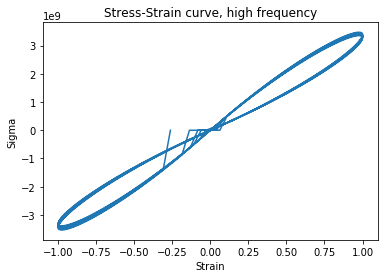

In [27]:
Strain_plot=list(Strain)
Sigma_plot=list(Sigma)
plt.plot(Strain_plot,Sigma_plot)
plt.xlabel('Strain')
plt.ylabel('Sigma')
plt.title('Stress-Strain curve, high frequency' )
plt.savefig('Stress_Strain_nodamage_highfreq')

### Thermodynamic consistency and energy loss

In [28]:
Elastic_contribution=0
Viscous_contribution=0.5*Sigma*Strain
Free_energy=Elastic_contribution+Viscous_contribution
eta=3850*10**6
Strain_rate_high=np.zeros(len(t)-1)
for j in range(len(Strain_rate_high)-1):
    Strain_rate_high[j]=(Strain[j+1]-Strain[j])/dt
from scipy import integrate
Energy_dissipation_highFreq1=integrate.simps(eta*np.square(Strain_rate_high),axis=0)



Text(0.5, 1.0, 'Evolution of the energy, high frequency,constant amplitude')

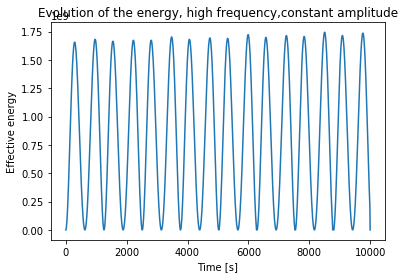

In [29]:
plt.plot(t,Free_energy)
plt.xlabel('Time [s]')
plt.ylabel('Effective energy')
plt.title('Evolution of the energy, high frequency,constant amplitude')

## High frequency, with change of amplitude 

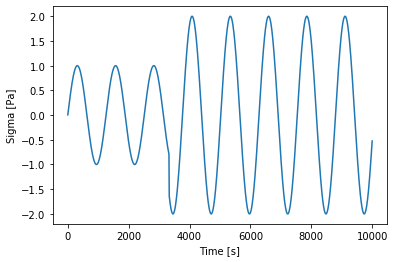

In [30]:
G0=3518520000.0
dt=10#s
tf=10000 #s
t=np.linspace(1,tf,int(tf/dt))
u0=np.zeros((len(t)))
u0[0:int(len(t)/3)]=np.sin(t[0:int(len(t)/3)]/200)
u0[int(len(t)/3):int(2*len(t)/3)]=2*np.sin(t[int(len(t)/3):int(2*len(t)/3)]/200)
u0[int(2*len(t)/3):len(t)]=2*np.sin(t[int(2*len(t)/3):len(t)]/200)
G=np.array(ComputeG(t,u0,G0,mu,lambd))
l=1 #Lengh of the bar
nodes=np.array([0,1])*l
mu=9.99/10
nu=0.35
E=9500
A=1
quads=0
weights=2
connectivity=conn
lambd=900
F_ext2=np.zeros((len(t),2))
blocades=np.zeros((2,1),dtype=bool)
blocades[0]=True
blocades[1]=False
D,U,K,StrainHigh,SigmaHigh=ViscoElasticSolution1DSIN(t,u0,G0,G,dt,tf,tol,F_ext2,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades)
fig,ax=plt.subplots()
ax.plot(t,StrainHigh)
plt.xlabel('Time [s]')
plt.ylabel('Sigma [Pa]')
plt.tight_layout
plt.show()

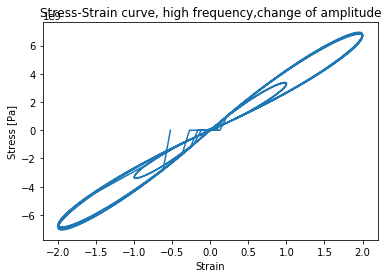

In [31]:
plt.plot(StrainHigh,SigmaHigh)
plt.xlabel('Strain')
plt.ylabel('Stress [Pa]')
plt.title('Stress-Strain curve, high frequency,change of amplitude')
plt.savefig('Stress_Strain_nodamage_INtfreq.jpg')

In [32]:
Elastic_contribution=0
Viscous_contribution=0.5*Sigma*Strain
Free_energy=Elastic_contribution+Viscous_contribution
eta=3850*10**6
Strain_rate_high=np.zeros(len(t)-1)
for j in range(len(Strain_rate_high)-1):
    Strain_rate_high[j]=(StrainHigh[j+1]-StrainHigh[j])/dt
from scipy import integrate
Energy_dissipation_highFreq2=integrate.simps(eta*np.square(Strain_rate_high),axis=0)
Energy_dissipation_highFreq1/10**9,Energy_dissipation_highFreq2/10**9

(0.047782562843847166, 0.16031667515740647)

## Intermediate frequency, without change of amplitude

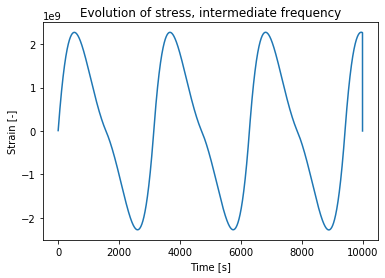

In [33]:
G0=3518520000.0
dt=1#s
tf=10000 #s
t=np.linspace(1,tf,int(tf/dt))
u0=np.sin(t/500)
G=np.array(ComputeG(t,u0,G0,mu,lambd))
l=1 #Lengh of the bar
nodes=np.array([0,1])*l
mu=9.99/10
nu=0.35
E=9500
A=1
quads=0
weights=2
connectivity=conn
lambd=900
F_ext2=np.zeros((len(t),2))
blocades=np.zeros((2,1),dtype=bool)
blocades[0]=True
blocades[1]=False
D,U,K,StrainInt,SigmaInt=ViscoElasticSolution1DSIN(t,u0,G0,G,dt,tf,tol,F_ext2,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades)
fig,ax=plt.subplots()
ax.plot(t,SigmaInt)
plt.xlabel('Time [s]')
plt.ylabel('Strain [-]')
plt.title('Evolution of stress, intermediate frequency')
plt.savefig('SinstressInt.jpg')
plt.tight_layout
plt.show()

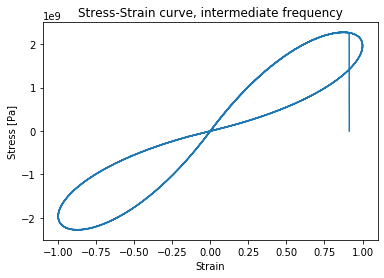

In [34]:
plt.plot(StrainInt,SigmaInt)
plt.xlabel('Strain')
plt.ylabel('Stress [Pa]')
plt.title('Stress-Strain curve, intermediate frequency')
plt.savefig('Stress_Strain_nodamage_INtfreq')

Text(0.5, 1.0, 'Evolution of the energy, intermediate frequency,constante amplitude')

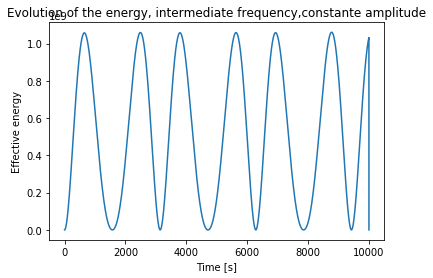

In [35]:
Elastic_contributionInt=0
Viscous_contributionInt=0.5*SigmaInt*StrainInt
Free_energyInt=Elastic_contributionInt+Viscous_contributionInt
eta=3850*10**6
Strain_rate_Int=np.zeros(len(t)-1)
for j in range(len(StrainInt)-1):
    Strain_rate_Int[j]=(StrainInt[j+1]-StrainInt[j])/dt
from scipy import integrate
Energy_dissipation_Int1=integrate.simps(eta*np.square(Strain_rate_Int),axis=0)
plt.plot(t,Free_energyInt)
plt.xlabel('Time [s]')
plt.ylabel('Effective energy')
plt.title('Evolution of the energy, intermediate frequency,constante amplitude')

## Intermediate frequency, with change of amplitude

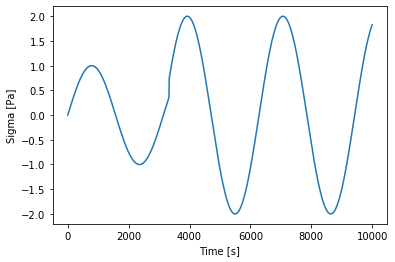

In [39]:
G0=3518520000.0
dt=10#s
tf=10000 #s
t=np.linspace(1,tf,int(tf/dt))
u0=np.zeros((len(t)))
u0[0:int(len(t)/3)]=np.sin(t[0:int(len(t)/3)]/500)
u0[int(len(t)/3):int(2*len(t)/3)]=2*np.sin(t[int(len(t)/3):int(2*len(t)/3)]/500)
u0[int(2*len(t)/3):len(t)]=2*np.sin(t[int(2*len(t)/3):len(t)]/500)
G=np.array(ComputeG(t,u0,G0,mu,lambd))
l=1 #Lengh of the bar
nodes=np.array([0,1])*l
mu=9.99/10
nu=0.35
E=9500
A=1
quads=0
weights=2
connectivity=conn
lambd=900
F_ext2=np.zeros((len(t),2))
blocades=np.zeros((2,1),dtype=bool)
blocades[0]=True
blocades[1]=False
D,U,K,StrainInt,SigmaInt=ViscoElasticSolution1DSIN(t,u0,G0,G,dt,tf,tol,F_ext2,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades)
fig,ax=plt.subplots()
ax.plot(t,StrainInt)
plt.xlabel('Time [s]')
plt.ylabel('Sigma [Pa]')
plt.tight_layout
plt.show()


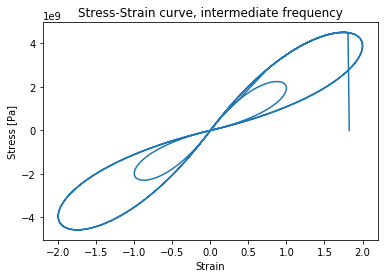

In [40]:
plt.plot(StrainInt,SigmaInt)
plt.xlabel('Strain')
plt.ylabel('Stress [Pa]')
plt.title('Stress-Strain curve, intermediate frequency')
plt.savefig('Stress_Strain_nodamage_INtfreq.jpg')

(0.07840993160771641, 0.02725840720010638)

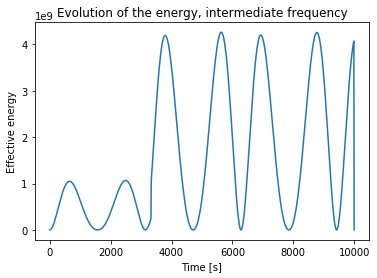

In [41]:
Elastic_contributionInt=0
Viscous_contributionInt=0.5*SigmaInt*StrainInt
Free_energyInt=Elastic_contributionInt+Viscous_contributionInt
eta=3850*10**6
Strain_rate_Int=np.zeros(len(t)-1)
for j in range(len(StrainInt)-1):
    Strain_rate_Int[j]=(StrainInt[j+1]-StrainInt[j])/dt
from scipy import integrate
Energy_dissipation_Int2=integrate.simps(eta*np.square(Strain_rate_Int),axis=0)
plt.plot(t,Free_energyInt)
plt.xlabel('Time [s]')
plt.ylabel('Effective energy')
plt.title('Evolution of the energy, intermediate frequency')
Energy_dissipation_Int1/10**9,Energy_dissipation_Int2/10**9

## Low frequency without change of amplitude

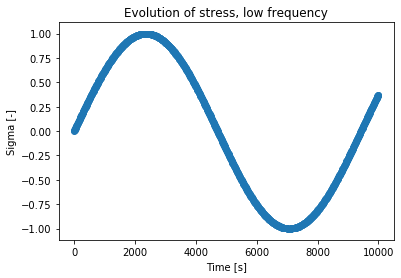

In [42]:
G0=3518520000.0
dt=10#s
tf=10000 #s
t=np.linspace(1,tf,int(tf/dt))
u0=np.sin(t/1500)
G=np.array(ComputeG(t,u0,G0,mu,lambd))
l=1 #Lengh of the bar
nodes=np.array([0,1])*l
mu=9.99/10
nu=0.35
E=9500
A=1
quads=0
weights=2
connectivity=conn
lambd=900
F_ext2=np.zeros((len(t),2))
blocades=np.zeros((2,1),dtype=bool)
blocades[0]=True

D,U,K,StrainLow,SigmaLow=ViscoElasticSolution1DSIN(t,u0,G0,G,dt,tf,tol,F_ext2,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades)
fig,ax=plt.subplots()
ax.scatter(t,StrainLow)
plt.xlabel('Time [s]')
plt.ylabel('Sigma [-]')
plt.title('Evolution of stress, low frequency')
plt.tight_layout
plt.savefig('SinStressLow.jpg')
plt.show()

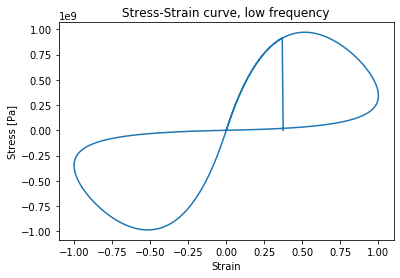

In [43]:
plt.plot(StrainLow,SigmaLow)
plt.xlabel('Strain')
plt.ylabel('Stress [Pa]')
plt.title('Stress-Strain curve, low frequency')
plt.savefig('Stress_Strain_nodamage_LOWfreq.jpg')

Text(0.5, 1.0, 'Strain rate evolution, low frequency,constant amplitude')

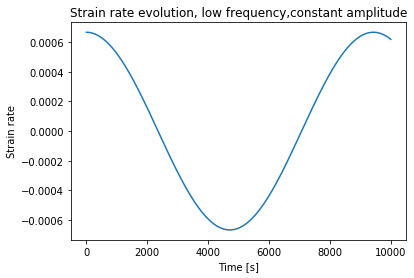

In [44]:
Elastic_contributionLow=0
Viscous_contributionLow=0.5*SigmaLow*StrainLow
Free_energyLow=Elastic_contributionLow+Viscous_contributionLow
eta=3850*10**6
Strain_rate_Low=np.zeros(len(t)-1)
for j in range(len(StrainLow)-1):
    Strain_rate_Low[j]=(StrainLow[j+1]-StrainLow[j])/dt
from scipy import integrate
Energy_dissipation_Low1=integrate.simps(eta*np.square(Strain_rate_Low),axis=0)
t_plot=np.linspace(1,tf,int(tf/dt)-1)
idx=np.logical_not((t_plot<1000)==False)
plt.plot(t_plot,Strain_rate_Low)
plt.xlabel('Time [s]')
plt.ylabel('Strain rate')
plt.title('Strain rate evolution, low frequency,constant amplitude')

Text(0.5, 1.0, 'Evolution of the energy, Low frequency, constant amplitude')

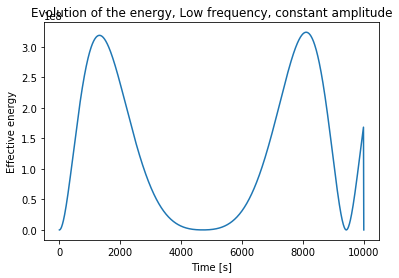

In [45]:
plt.plot(t,Free_energyLow)
plt.xlabel('Time [s]')
plt.ylabel('Effective energy')
plt.title('Evolution of the energy, Low frequency, constant amplitude')

## Low frequency with change of amplitutde

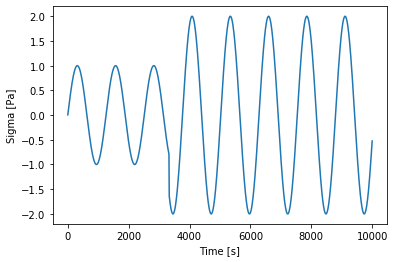

In [46]:
G0=3518520000.0
dt=10#s
tf=10000 #s
t=np.linspace(1,tf,int(tf/dt))
u0=np.zeros((len(t)))
u0[0:int(len(t)/3)]=np.sin(t[0:int(len(t)/3)]/1500)
u0[int(len(t)/3):int(2*len(t)/3)]=2*np.sin(t[int(len(t)/3):int(2*len(t)/3)]/1500)
u0[int(2*len(t)/3):len(t)]=2*np.sin(t[int(2*len(t)/3):len(t)]/1500)
G=np.array(ComputeG(t,u0,G0,mu,lambd))
l=1 #Lengh of the bar
nodes=np.array([0,1])*l
mu=9.99/10
nu=0.35
E=9500
A=1
quads=0
weights=2
connectivity=conn
lambd=900
F_ext2=np.zeros((len(t),2))
blocades=np.zeros((2,1),dtype=bool)
blocades[0]=True
blocades[1]=False
D,U,K,StrainLow,SigmaLow=ViscoElasticSolution1DSIN(t,u0,G0,G,dt,tf,tol,F_ext2,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades)
fig,ax=plt.subplots()
ax.plot(t,StrainHigh)
plt.xlabel('Time [s]')
plt.ylabel('Sigma [Pa]')
plt.tight_layout
plt.show()

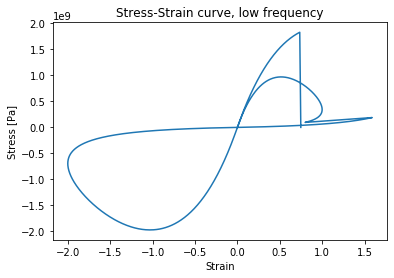

In [47]:
plt.plot(StrainLow,SigmaLow)
plt.xlabel('Strain')
plt.ylabel('Stress [Pa]')
plt.title('Stress-Strain curve, low frequency')
plt.savefig('Stress_Strain_nodamage_LOWfreq')

In [48]:
Elastic_contributionLow=0
Viscous_contributionLow=0.5*SigmaLow*StrainLow
Free_energyLow=Elastic_contributionLow+Viscous_contributionLow
eta=3850*10**6
Strain_rate_Low=np.zeros(len(t)-1)
for j in range(len(StrainLow)-1):
    Strain_rate_Low[j]=(StrainLow[j+1]-StrainLow[j])/dt
from scipy import integrate
Energy_dissipation_Low2=integrate.simps(eta*np.square(Strain_rate_Low),axis=0)


Text(0.5, 1.0, 'Evolution of the energy, Low frequency')

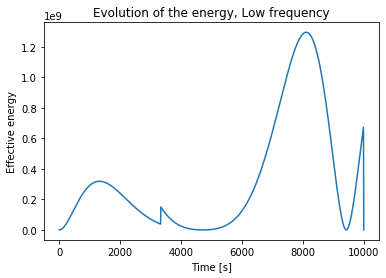

In [49]:
plt.plot(t,Free_energyLow)
plt.xlabel('Time [s]')
plt.ylabel('Effective energy')
plt.title('Evolution of the energy, Low frequency')

In [50]:
Energy_dissipation_Low1/10**9,Energy_dissipation_Low2/10**9

(0.0008991252019727137, 0.018984735363130455)

In [51]:
Energy_dissipations=np.array([[Energy_dissipation_highFreq1,Energy_dissipation_Int1,Energy_dissipation_Low1]])
E=pd.DataFrame(data=Energy_dissipations,columns=['High frequency','Interm','Low'])
E

,High frequency,Interm,Low
0,4.778256e+07,7.840993e+07,899125.201973


In [52]:
def Energydissipation(t,G0,eta,dt,tf,tol,F_ext,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades): 
    Energydiss=[]
    omega=np.linspace(0,0.02,100)
    Strain_rate=np.zeros(len(t)-1)
    from scipy import integrate
    for i in range(len(omega)): 
        u0=np.cos(t*omega[i])
        G=np.array(ComputeG(t,u0,G0,mu,lambd))
        D,U,K,Strain,Sigma=ViscoElasticSolution1DSIN(t,u0,G0,G,dt,tf,tol,F_ext,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades)
        for j in range(len(t)-1):
            Strain_rate[j]=(Strain[j+1]-Strain[j])/dt
        Integral=integrate.simps(eta*np.square(Strain_rate),axis=0)
        Energydiss.append(Integral)
    return Energydiss,omega

Energydiss,omega=Energydissipation(t,G0,eta,dt,tf,tol,F_ext2,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades)


ValueError: could not broadcast input array from shape (3,) into shape (1,)

In [ ]:
plt.plot(omega,Energydiss)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Energy dissipated')
plt.title('Evolution of energy dissipation with frequency,constant amplitude ')

In [69]:
def EnergydissipationVariableAmplitude(t,G0,eta,dt,tf,tol,F_ext,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades): 
    Energydiss=[]
    omega=np.linspace(0,0.02,100)
    Strain_rate=np.zeros(len(t)-1)
    from scipy import integrate
    for i in range(len(omega)): 
        u0[0:int(len(t)/3)]=np.sin(t[0:int(len(t)/3)]*omega[i])
        u0[int(len(t)/3):int(2*len(t)/3)]=2*np.sin(t[int(len(t)/3):int(2*len(t)/3)]*omega[i])
        u0[int(2*len(t)/3):len(t)]=2*np.sin(t[int(2*len(t)/3):len(t)]*omega[i])
        G=np.array(ComputeG(t,u0,G0,mu,lambd))
        D,U,K,Strain,Sigma=ViscoElasticSolution1DSIN(t,u0,G0,G,dt,tf,tol,F_ext,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades)
        for j in range(len(t)-1):
            Strain_rate[j]=(Strain[j+1]-Strain[j])/dt
        Integral=integrate.simps(eta*np.square(Strain_rate),axis=0)
        Energydiss.append(Integral)
    return Energydiss,omega

Energydiss1,omega1=EnergydissipationVariableAmplitude(t,G0,eta,dt,tf,tol,F_ext2,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades)


ValueError: could not broadcast input array from shape (3,) into shape (2,)

In [70]:
plt.plot(omega1,Energydiss1)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Energy dissipated')
plt.title('Evolution of energy dissipation with frequency,Variable amplitude ')

NameError: name 'omega1' is not defined

### Thermodynamic consistency and energy loss

## Multiple 1-D elements

I) Assembling the stiffness matrix

In [71]:
def AssembleStiffness(D,coord, conn, nb_elem, nb_ddl_tot,quads,weights,l):
    K = np.zeros((nb_ddl_tot, nb_ddl_tot))
    for e in range(nb_elem):
        conn_element=conn[e,:]
        nodes = coord[conn_element.ravel()]
        Kl = ComputeK1D(quads,weights,nodes,D,l)
        for i in range(2):
                for j in range(2):
                    K[e+i, e+j] = K[e+i, e+j] + Kl[i, j]
    return K

nb_elem=2
eqn_elem=np.array([[0, 1],
    [1,2]]) #Number of the equation associated wih each nodes
l=1
nb_ddl_tot=3





def Strain1DMultipleElements(u,conn,coord,l): #for one time step t
    n_elem=conn.shape[0]
    Strain=np.zeros((1,n_elem))
    for e in range(n_elem):
        conn_element=conn[e,:]
        nodes = coord[conn_element.ravel()]
        B,J=FiniteElement1D(0,nodes,l)
        epsilon=B@u[conn_element.ravel()]
        Strain[0,e]=epsilon
    return Strain

def Sigma1DMultipleElements(u,conn,coord,D,l):
    n_elem=conn.shape[0]
    sigma=np.zeros((1,n_elem))
    for e in range(n_elem):
        epsilon_el=Strain1DMultipleElements(u,conn,coord,l)
        sigma[0,e]=D*epsilon_el
    return sigma

def ComputeNumEq(conn):
    n_elem  = conn.shape[0]
    n_nodes_per_elem = conn.shape[1]
    numEquation = np.zeros((n_elem,n_nodes_per_elem), dtype=int)
    for e in range(n_elem):
        for i in range(n_nodes_per_elem):
            numEquation[e, i]   = 2*conn[e, i];
            
    return numEquation












In [72]:
def AssembleStiffness(D,coord, conn, nb_elem, nb_ddl_tot,quads,weights,l):
    K = np.zeros((nb_ddl_tot, nb_ddl_tot))
    for e in range(nb_elem):
        conn_element=conn[e,:]
        nodes = coord[conn_element.ravel()]
        Kl = ComputeK1D(quads,weights,nodes,D,l)
        for i in range(2):
                for j in range(2):
                    K[e+i, e+j] = K[e+i, e+j] + Kl[i, j]
    return K





In [73]:
def ViscoElasticSolution1DMultipleElements(u0,G0,dt,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem):
    K_modulus=E/(3*(1-2*nu)) #Bulk modulus: not time dependant
    t=np.linspace(1,tf,int(tf/dt))
    U=np.zeros((len(t),nb_nodes)) #Big Matrix: each row is the displacement at each node at time t
    if type(u0)==float:
        U[:,nb_nodes-1]=u0 #First row--> First displacement (if we impose a displacement this row is non zero)
    else: 
        U[:,nb_nodes-1]=u0
   
    G=np.zeros((len(t),1)) #Vector of G where at each time step we have a new G as G is time dependent
    D=np.zeros((len(t),1))
    G[0]=G0 #Given in the paper
    lambd_lamé=np.zeros((len(t),1)) #Lamé coefficient--> Going to appear in our constitutive model, time dependant
    lambd_lamé[0]=K_modulus-(2/3)*G[0]#constitutive model, time dependent 
    D[0]=lambd_lamé[0]+2*G[0] #initial constitutive model
    K=AssembleStiffness(D[0],coord, conn, nb_elem, nb_ddl_tot,quads,weights,l)
    B,J=FiniteElement1D(quads,nodes,l) #Matrix B and jacobian with gauss points
    Strain=np.zeros((len(t),nb_elem))#at each time t we have a new strain because we have a new displacement
    Strain[0,:]=Strain1DMultipleElements(U[0,:],conn,coord,l)
    Sigma=np.zeros((len(t),nb_elem))
    if F_ext[0,nb_nodes-1]>0:
        Sigma[0,0:nb_elem-1]=D[0]*Strain[0,0:nb_elem-1]
        Sigma[0,nb_elem-1]=F_ext[0,nb_nodes-1]/A
    else:
        Sigma[0,:]=D[0]*Strain[0,:]
          
    
   
    free=np.logical_not(blocades).ravel()
    imposed=np.logical_not(blocades==False).ravel()
    for i in range(1,len(t)):
        #F_ext[i]=
        R_norm=2*tol
        k=0
       
        G[i]=G0*((1-mu)+mu*np.exp(-t[i]/lambd))
        lambd_lamé[i]=K_modulus-(2/3)*G[i] #update lamé coef
        D[i]=lambd_lamé[i]+2*G[i] 
        K=AssembleStiffness(D[i],coord, conn, nb_elem, nb_ddl_tot,quads,weights,l) #update matrix K at time t 
        if U[i,imposed].shape[0]==1:
            U[i,free]=np.linalg.solve(K[free,:][:,free],F_ext[i,free]-K[free,imposed]*U[i,imposed])
        else:
            U[i,free]=np.linalg.solve(K[free,:][:,free],F_ext[i,free]-K[free,:][:,imposed]@U[i,imposed])
        #KEF*F for u
        
        
        Strain[i,:]=Strain1DMultipleElements(U[i,:],conn,coord,l)
        Sigma[i,:]=D[i]*Strain[i,:]
        
 
        
    return G,D,U,K,Strain,Sigma
            

## Creep test: Constant force at the last element,only left side embedded

## Easy case : 2 element

In [74]:
#test 
G0=3518.52*10**6
nb_nodes=3
u0=0
dt=50 #s
tf=10000 #s
tol=10**-2
niter=10000     
l=1 #Lengh of the bar
nb_ddl_tot=3
nb_elem=2
nb_nodes_per_elem=2
conn=np.array([[0,1],[1,2]])
coord=np.array([[0],[1],[2]])*l
#eqn_elem=ComputeNumEq(conn)
nu=0.35
E=9500*10**6
A=1
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext=np.zeros((len(t),nb_nodes))*0.64#force applie
F_ext[:,nb_nodes-1]=0.64*10**6

blocades=np.zeros((nb_nodes,1),dtype=bool )
for i in range(len(blocades)):
    blocades[i]=False
blocades[0]=True


G1,D1,U1,K1,Strain1,Sigma1=ViscoElasticSolution1DMultipleElements(u0,G0,dt,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem)




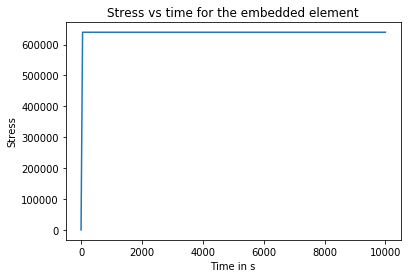

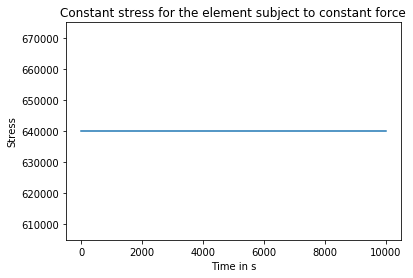

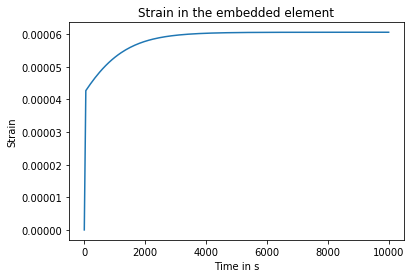

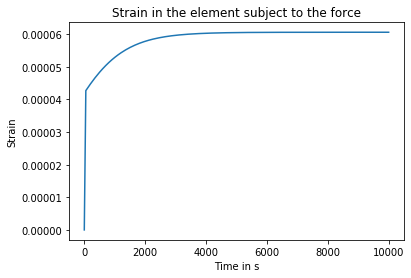

In [75]:
fig,ax=plt.subplots()
ax.plot(t,Sigma1[:,0])
ax.set_xlabel('Time in s')
ax.set_ylabel('Stress')
plt.title('Stress vs time for the embedded element')
plt.savefig('Mnt1.jpg')
fig,ax3=plt.subplots()
ax3.plot(t,Sigma1[:,1])
ax3.set_xlabel('Time in s')
ax3.set_ylabel('Stress')
plt.title('Constant stress for the element subject to constant force')
plt.savefig('Mnt2.jpg')
fig,ax2=plt.subplots()
ax2.plot(t,Strain1[:,0])
ax2.set_xlabel('Time in s')
ax2.set_ylabel('Strain')
plt.title('Strain in the embedded element')
plt.savefig('Mnt3.jpg')
fig,ax2=plt.subplots()
ax2.plot(t,Strain1[:,1])
ax2.set_xlabel('Time in s')
ax2.set_ylabel('Strain')
plt.title('Strain in the element subject to the force')
plt.savefig('Mnt4.jpg')


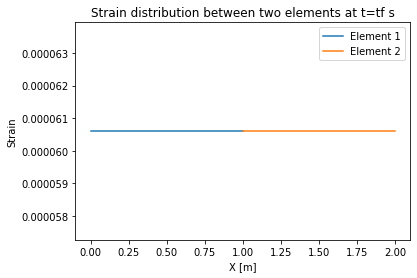

In [76]:
l=1
x1=np.linspace(0,l,len(t))
x2=np.linspace(l,2*l,len(t))

plt.plot(x1,Strain1[len(t)-1,0]*np.ones((len(t))),label='Element 1')
plt.plot(x2,Strain1[len(t)-1,1]*np.ones((len(t))),label='Element 2')
plt.xlabel('X [m]')
plt.ylabel('Strain')
plt.title('Strain distribution between two elements at t=tf s')
plt.legend()

plt.savefig('now.jpg')

## Creep test : Constant force in the middle node, multiple bar elements of unit length and unit area

## Easy case: 2 elements

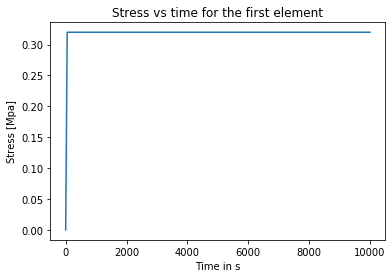

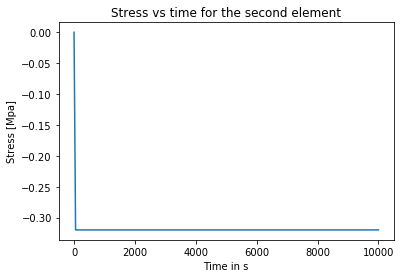

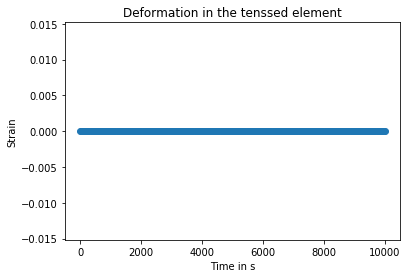

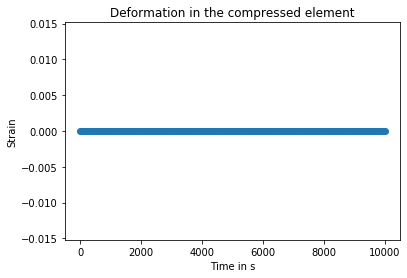

In [77]:
#test 
G0=3518.52*10**6
nb_nodes=3
u0=0

dt=50 #s
tf=10000 #s
tol=10**-2
niter=10000     
l=1 #Lengh of the bar
nb_ddl_tot=3
nb_elem=2
nb_nodes_per_elem=2
conn=np.array([[0,1],[1,2]])
coord=np.array([[0],[1],[2]])*l
#eqn_elem=ComputeNumEq(conn)
nu=0.35
E=9500*10**6
A=1
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext=np.zeros((len(t),nb_nodes))*0.64#force applie
F_ext[:,nb_nodes-2]=0.64*10**6

blocades=np.zeros((nb_nodes,1),dtype=bool )
for i in range(len(blocades)):
    blocades[i]=False
blocades[0]=True
blocades[nb_nodes-1]=True

G1,D1,U1,K1,Strain1,Sigma1=ViscoElasticSolution1DMultipleElements(u0,G0,dt,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem)
fig,ax=plt.subplots()
ax.plot(t,Sigma1[:,0]/10**6)
ax.set_xlabel('Time in s')
ax.set_ylabel('Stress [Mpa]')
plt.title('Stress vs time for the first element')
plt.savefig('MNT1.jpg')
fig,ax3=plt.subplots()
ax3.plot(t,Sigma1[:,1]/10**6)
ax3.set_xlabel('Time in s')
ax3.set_ylabel('Stress [Mpa]')
plt.title('Stress vs time for the second element')
plt.savefig('MNT2.jpg')
fig,ax2=plt.subplots()
ax2.scatter(t,Strain1[:,0])
ax2.set_xlabel('Time in s')
ax2.set_ylabel('Strain')
plt.title('Deformation in the tenssed element')
plt.savefig('Mnt3.jpg')
fig,ax2=plt.subplots()
ax2.scatter(t,Strain1[:,1])
ax2.set_xlabel('Time in s')
ax2.set_ylabel('Strain')
plt.title('Deformation in the compressed element')
plt.savefig('Mnt4.jpg')

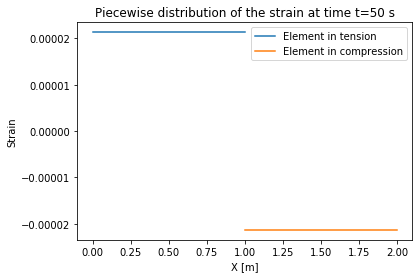

In [78]:
l=1
x1=np.linspace(0,l,len(t)-1)
x2=np.linspace(l,2*l,len(t)-1)
Strain_plot1=np.ones((len(t)-1))*Strain1[1,0]
Strain_plot2=np.ones((len(t)-1))*Strain1[1,1]
plt.plot(x1,Strain_plot1,label='Element in tension')
plt.plot(x2,Strain_plot2,label='Element in compression')
plt.legend()
plt.xlabel('X [m]')
plt.ylabel('Strain')
plt.title('Piecewise distribution of the strain at time t=50 s')
plt.savefig('PiecewiseStrain_twoelementsForceMidle')

## Force in the middle of 4 elements


Text(0.5, 1.0, 'Strain in the third element')

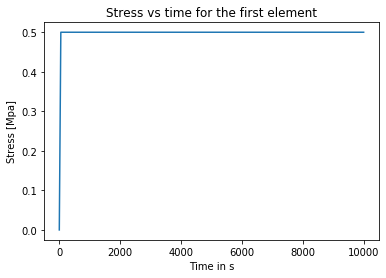

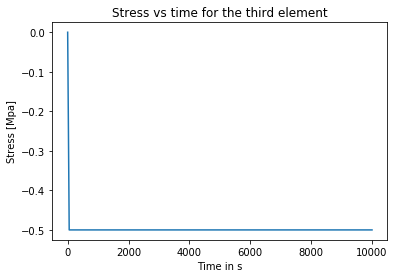

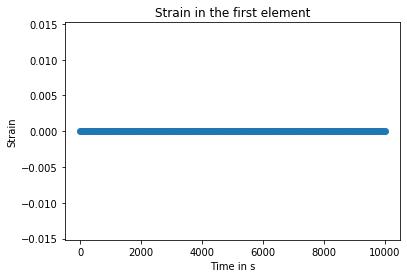

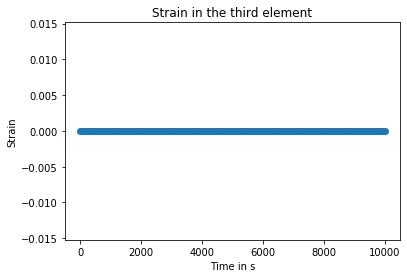

In [79]:
#test 
G0=3518.52*10**6
nb_nodes=5
u0=0#displacement at the end of the second element
dt=50 #s
tf=10000 #s
tol=10**-2
niter=10000     
l=1 #Lengh of the bar
nb_ddl_tot=5
nb_elem=4
nb_nodes_per_elem=2
conn=np.array([[0,1],[1,2],[2,3],[3,4]])
coord=np.array([[0],[1],[2],[3],[4]])*l
#eqn_elem=ComputeNumEq(conn)
nu=0.35
E=9500*10**6
A=1
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext=np.zeros((len(t),nb_nodes)) #force applie
F_ext[:,int(nb_nodes/2)]=10**6
blocades=np.zeros((nb_nodes,1),dtype=bool )
for i in range(len(blocades)):
    blocades[i]=False
blocades[0]=True
blocades[nb_nodes-1]=True

nb_ddl_tot=5

G2,D2,U2,K2,Strain2,Sigma2=ViscoElasticSolution1DMultipleElements(u0,G0,dt,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem)

fig,ax=plt.subplots()
ax.plot(t,Sigma2[:,0]/10**6)
ax.set_xlabel('Time in s')
ax.set_ylabel('Stress [Mpa]')
plt.title('Stress vs time for the first element')
fig,ax3=plt.subplots()
ax3.plot(t,Sigma2[:,3]/10**6)
ax3.set_xlabel('Time in s')
ax3.set_ylabel('Stress [Mpa]')
plt.title('Stress vs time for the third element')
fig,ax2=plt.subplots()
ax2.scatter(t,Strain2[:,0])
ax2.set_xlabel('Time in s')
ax2.set_ylabel('Strain')
plt.title('Strain in the first element')
fig,ax2=plt.subplots()
ax2.scatter(t,Strain2[:,2])
ax2.set_xlabel('Time in s')
ax2.set_ylabel('Strain')
plt.title('Strain in the third element')


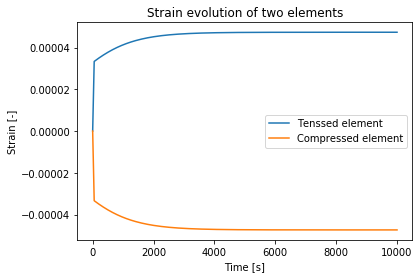

In [80]:
plt.plot(t,Strain2[:,0],label='Tenssed element')
plt.plot(t,Strain2[:,2],label='Compressed element')
plt.legend()
plt.title('Strain evolution of two elements')
plt.xlabel('Time [s]')
plt.ylabel('Strain [-]')
plt.savefig('yes.jpg')

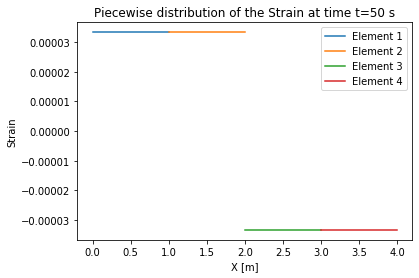

In [81]:
l=1
x1=np.linspace(0,l,len(t)-1)
x2=np.linspace(l,2*l,len(t)-1)
x3=np.linspace(2*l,3*l,len(t)-1)
x4=np.linspace(3*l,4*l,len(t)-1)
x5=np.linspace(4*l,5*l,len(t)-1)
Strain_plot1=np.ones((len(t)-1))*Strain2[1,0]
Strain_plot2=np.ones((len(t)-1))*Strain2[1,1]
Strain_plot3=np.ones((len(t)-1))*Strain2[1,2]
Strain_plot4=np.ones((len(t)-1))*Strain2[1,3]

plt.plot(x1,Strain_plot1,label='Element 1')
plt.plot(x2,Strain_plot2,label='Element 2')
plt.plot(x3,Strain_plot3,label='Element 3')
plt.plot(x4,Strain_plot4,label='Element 4')
plt.legend()
plt.xlabel('X [m]')
plt.ylabel('Strain')
plt.title('Piecewise distribution of the Strain at time t=50 s')
plt.savefig('Piecewise_distribution4elements.jpg')

## Relaxation test : Constant displacement at the end of the last bar,two elements, three nodes

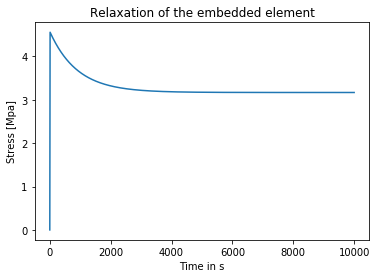

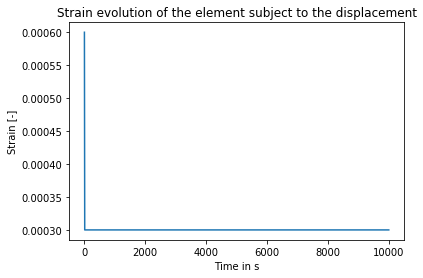

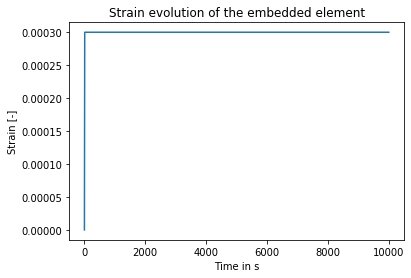

In [82]:
#test 
G0=3518.52*10**6
nb_nodes=3
u0=6*10**-4#displacement at the end of the second element

dt=10 #s
tf=10000 #s
tol=10**-2
niter=10000     
l=1 #Lengh of the bar
nb_ddl_tot=3
nb_elem=2
nb_nodes_per_elem=2
conn=np.array([[0,1],[1,2]])
coord=np.array([[0],[1],[2]])
#eqn_elem=ComputeNumEq(conn)
nu=0.35
E=9500*10**6
A=1
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext=np.zeros((len(t),nb_nodes)) 
blocades=np.zeros((nb_nodes,1),dtype=bool )
for i in range(len(blocades)):
    blocades[i]=False
blocades[0]=True
blocades[nb_nodes-1]=True

nb_ddl_tot=3

G,D,U,K,Strain,Sigma=ViscoElasticSolution1DMultipleElements(u0,G0,dt,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem)

fig,ax=plt.subplots()
ax.plot(t,Sigma[:,0]/10**6)
#plt.tight_layout
ax.set_xlabel('Time in s')
ax.set_ylabel('Stress [Mpa]')
plt.title('Relaxation of the embedded element')
plt.savefig('Now.jpg')
fig,ax2=plt.subplots()
ax2.plot(t,Strain[:,1])
ax2.set_xlabel('Time in s')
ax2.set_ylabel('Strain [-]')
plt.title('Strain evolution of the element subject to the displacement')
plt.savefig('Strain of  element subject to displacement_2 element.jpg')
fig,ax3=plt.subplots()
ax3.plot(t,Strain[:,0])
ax3.set_xlabel('Time in s')
ax3.set_ylabel('Strain [-]')
plt.title('Strain evolution of the embedded element')
plt.savefig('Strain of  element embeded to displacement_2 element.jpg')


## Constant displacement a the end of the last out of 5 elements: Relaxation test for  5elements

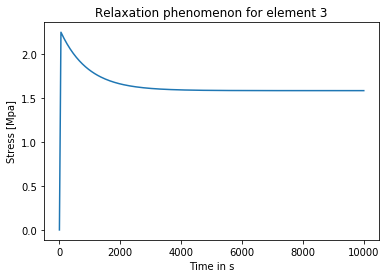

In [83]:
#test 
G0=3518.52*10**6
nb_nodes=5
u0=6*10**-4#displacement at the end of the fifth
dt=50 #s
tf=10000 #s
tol=10**-2
niter=10000     
l=1 #Lengh of the bar
nb_ddl_tot=5
nb_elem=4
nb_nodes_per_elem=2
conn=np.array([[0,1],[1,2],[2,3],[3,4]])
coord=np.array([[0],[1],[2],[3],[4]])*l
nu=0.35
E=9500*10**6
A=1
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext=np.zeros((len(t),nb_nodes)) #force applie
blocades=np.zeros((nb_nodes,1),dtype=bool )
for i in range(len(blocades)):
    blocades[i]=False
blocades[0]=True
blocades[nb_nodes-1]=True

nb_ddl_tot=5

G,D,U,K,Strain,Sigma=ViscoElasticSolution1DMultipleElements(u0,G0,dt,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem)
plt.plot(t,Sigma[:,2]/10**6)
plt.xlabel('Time in s')
plt.ylabel('Stress [Mpa]')
plt.title('Relaxation phenomenon for element 3')
plt.savefig('RelaxationPh_Force_rightside_4Elements')

## Second part: Damage 

In [84]:
def ViscoElasticSolutionDamage(u0,G0,B1,B2,r,k,dt,tf,tol,F_ext,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades):
    K_modulus=E/(3*(1-2*nu)) 
    t=np.linspace(1,tf,int(tf/dt))
    U=np.zeros((len(t),2)) #Big Matrix: each row is the displacement at each node at time t
    Damage=np.zeros((len(t),1))
    Damage[0]=0
    if type(u0)==float:
        U[:,1]=u0 #First row--> First displacement (if we impose a displacement this row is non zero)
    else: 
        U[:,1]=u0[0]
    G=np.zeros((len(t),1)) #Vector of G where at each time step we have a new G as G is time dependent
    D=np.zeros((len(t),1))
    G[0]=G0 #Given in the paper
    lambd_lamé=np.zeros((len(t),1)) #Lamé coefficient--> Going to appear in our constitutive model, time dependant
    lambd_lamé[0]=K_modulus-(2/3)*G[0]#constitutive model, time dependent 
    K=ComputeK1D(quads,weights,nodes,D[0],l)
    D[0]=lambd_lamé[0]+2*G[0] #initial constitutive model
    B,J=FiniteElement1D(quads,nodes,l) #Matrix B and jacobian with gauss points
    Strain=np.zeros((len(t),1)) #at each time t we have a new strain because we have a new displacement
    Strain[0]=B@U[0,:] #Initial strain
    Sigma=np.zeros((len(t),1))
    if F_ext[0,1]>0:
        Sigma[0]=F_ext[0,1]/A
    else: 
        Sigma[0]=D[0]*Strain[0]
    free = np.logical_not(blocades).ravel()
    for i in range(1,len(t)):
        G[i]=G0*((1-mu)+mu*np.exp(-t[i]/lambd))
        lambd_lamé[i]=K_modulus-(2/3)*G[i] #update lamé coef
        D[i]=lambd_lamé[i]+2*G[i] 
        K=ComputeK1D(quads,weights,nodes,D[i],l)*(1-Damage[i-1])#update matrix K at time t
        if U[0,1]==0: #if no displacement is imposed
            U[i,free]=np.linalg.solve(K[free,:][:, free],F_ext[i,free])
            Strain[i]=B@U[i,:]
        elif U[0,1]>0:# if we impose a constant deplacement
            if type(u0)==float:
                U[i,free]=u0
                Strain[i]=B@U[i,:]
            else:
                U[i,free]=u0[i]
                Strain[i]=B@U[i,:]
        if F_ext[i,1]>0:
            Sigma[i]=F_ext[i,1]/A
        else:
            Sigma[i]=D[i]*Strain[i]
        B_parameter=B1+B2*Sigma[i]
        
        if Sigma[i-1]>=0:
            if Damage[i-1]<0.9:
                Damage[i]=Damage[i-1]+(dt*B_parameter*Sigma[i-1]**r/(1-Damage[i-1])**k)*10**-6
            else: 
                Damage[i]=Damage[i-1]
        else: 
            Damage[i]=Damage[i-1]
        if Damage[i]>=1:
            Damage[i]=0.99
    
    return G,D,U,K,Strain,Sigma,Damage


















 

In [85]:
def ViscoElasticSolutionDamageSIN(u0,G0,G,B1,B2,r,k,dt,tf,tol,F_ext,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades):
    K_modulus=E/(3*(1-2*nu)) 
    t=np.linspace(1,tf,int(tf/dt))
    U=np.zeros((len(t),2)) #Big Matrix: each row is the displacement at each node at time t
    Damage=np.zeros((len(t),1))
    Damage[0]=0
    if type(u0)==float:
        U[:,1]=u0 #First row--> First displacement (if we impose a displacement this row is non zero)
    else: 
        U[:,1]=u0[0]
     #Vector of G where at each time step we have a new G as G is time dependent
    D=np.zeros((len(t),1))
     #Given in the paper
    lambd_lamé=np.zeros((len(t),1)) #Lamé coefficient--> Going to appear in our constitutive model, time dependant
    lambd_lamé[0]=K_modulus-(2/3)*G[0]#constitutive model, time dependent 
    K=ComputeK1D(quads,weights,nodes,D[0],l)
    D[0]=lambd_lamé[0]+2*G[0] #initial constitutive model
    B,J=FiniteElement1D(quads,nodes,l) #Matrix B and jacobian with gauss points
    Strain=np.zeros((len(t),1)) #at each time t we have a new strain because we have a new displacement
    Strain[0]=B@U[0,:] #Initial strain
    Sigma=np.zeros((len(t),1))
    Sigma[0]=D[0]*Strain[0]
    free = np.logical_not(blocades).ravel()
    for i in range(1,len(t)):
        lambd_lamé[i]=K_modulus-(2/3)*G[i] #update lamé coef
        D[i]=lambd_lamé[i]+2*G[i] 
        K=ComputeK1D(quads,weights,nodes,D[i],l)*(1-Damage[i-1])#update matrix K at time t
        if U[0,1]==0: #if no displacement is imposed
            U[i,free]=np.linalg.solve(K[free,:][:, free],F_ext[i,free])
            Strain[i]=B@U[i,:]
        elif U[0,1]>0:# if we impose a constant deplacement
            if type(u0)==float:
                U[i,free]=u0
                Strain[i]=B@U[i,:]
            else:
                U[i,free]=u0[i]
                Strain[i]=B@U[i,:]
        if F_ext[i,1]>0:
            Sigma[i]=F_ext[i,1]/A
        else:
            Sigma[i]=D[i]*Strain[i]
        B_parameter=B1+B2*Sigma[i]
        
        if Sigma[i-1]>=0:
            if Damage[i-1]<0.9:
                Damage[i]=Damage[i-1]+(dt*B_parameter*Sigma[i-1]**r/(1-Damage[i-1])**k)*10**-6
            else: 
                Damage[i]=Damage[i-1]
        else: 
            Damage[i]=Damage[i-1]
        if Damage[i]>=1:
            Damage[i]=0.99
    
    return D,U,K,Strain,Sigma,Damage



In [86]:
def ComputeGDamage(t,F,G0,mu,lambd,nb_nodes):
    G=np.zeros(len(t))
    G[0]=G0
    index_trac=0
    index_comp=0
    for i in range(len(t)-1):  
        if F[i,nb_nodes-1]>0:
            index_trac+=1
        else: 
            index_comp+=1
        G[i]=G0*((1-mu)+mu*np.exp(-t[index_trac-index_comp]/lambd))
                
        
    return G


## Variables 
- Damage rate
- Damage parameter D that varies from 0 to 1
- Damage variable 
- M= (1-D)
- B= B1+ B2*tr(sigma)
-  Macaulay bracket






## Relaxation test on a 1-D element, with damage

In [87]:
#test 
G0=3518.52*10**6
nb_nodes=2
u0=6*10**-4#displacement at the end of the second element
dt=0.1 #s
tf=10000 #s
tol=10**-2
niter=10000     
l=1 #Lengh of the bar
nb_ddl_tot=2
nb_elem=1
nb_nodes_per_elem=2
conn=np.array([[0,1]])
coord=np.array([[0],[1]])
nu=0.35
E=9500*10**6
A=1
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext=np.zeros((len(t),nb_nodes)) #force applie
blocades=np.zeros((nb_nodes,1),dtype=bool )
blocades[0]=True
blocades[1]=True

nb_ddl_tot=2





B1= 1.3955*10**-6
B2=0
r=0.9
k=0.02

G2,D2,U2,K2,Strain2,Sigma2,Damage2=ViscoElasticSolutionDamage(u0,G0,B1,B2,r,k,dt,tf,tol,F_ext,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades)




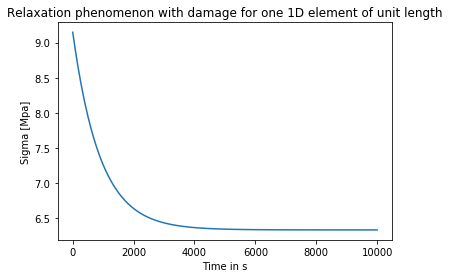

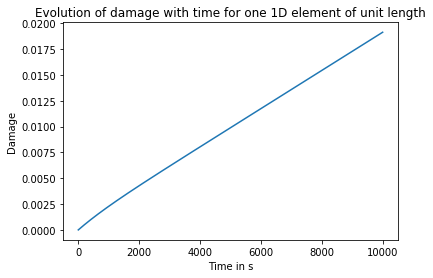

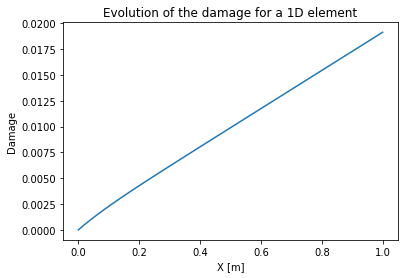

In [88]:
plt.plot(t,Sigma2/10**6)
plt.xlabel('Time in s')
plt.ylabel('Sigma [Mpa]')
plt.title('Relaxation phenomenon with damage for one 1D element of unit length')
plt.savefig('FirstRELAXATION_DAMAGE.jpg')
plt.show()
plt.plot(t,Damage2)
plt.xlabel('Time in s')
plt.ylabel('Damage')
plt.title('Evolution of damage with time for one 1D element of unit length')
plt.savefig('MNT2.jpg')
plt.show()
x=np.linspace(0,1,len(Damage2))
plt.plot(x,Damage2)
plt.xlabel('X [m]')
plt.ylabel('Damage')
plt.title('Evolution of the damage for a 1D element')
plt.savefig('FirstRELAXATION_DAMAGE_EVOLUTION.jpg')
plt.show()


## Creep simulation for 1-D element with damage 

In [89]:
#test 
G0=3518.52*10**6
nb_nodes=2
u0=0.0#displacement at the end of the second element
dt=0.1 #s
tf=10000 #s
tol=10**-2
niter=10000     
l=1 #Lengh of the bar
nb_ddl_tot=2
nb_elem=1
nb_nodes_per_elem=2
conn=np.array([[0,1]])
coord=np.array([[0],[1]])
nu=0.35
E=9500*10**6
A=1
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext=np.zeros((len(t),nb_nodes)) 
F_ext[:,1]=10**6
blocades=np.zeros((nb_nodes,1),dtype=bool )
blocades[0]=True


nb_ddl_tot=2





B1= 1.3955*10**-6
B2=0
r=0.9
k=0.02

G3,D3,U3,K3,Strain3,Sigma3,Damage3=ViscoElasticSolutionDamage(u0,G0,B1,B2,r,k,dt,tf,tol,F_ext,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades)


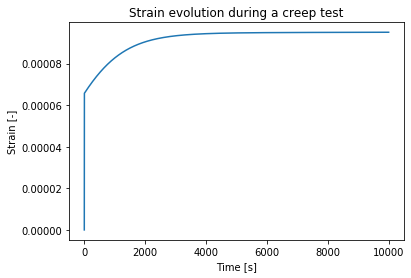

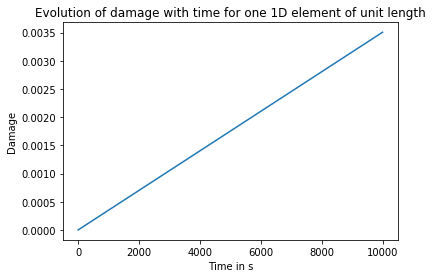

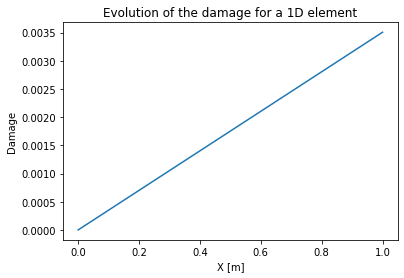

In [90]:
plt.plot(t,Strain3)
plt.xlabel('Time [s]')
plt.ylabel('Strain [-]')
plt.title('Strain evolution during a creep test')
plt.savefig('Creep_test_1DWITHDAMAGE.jpg')
plt.show()
plt.plot(t,Damage3)
plt.xlabel('Time in s')
plt.ylabel('Damage')
plt.title('Evolution of damage with time for one 1D element of unit length')
plt.savefig('Creep_test_1DWITHDAMAGE2.jpg')
plt.show()
x=np.linspace(0,1,len(Damage3))
plt.plot(x,Damage3)
plt.xlabel('X [m]')
plt.ylabel('Damage')
plt.title('Evolution of the damage for a 1D element')
plt.savefig('Creep_test_1DWITHDAMAGE3.jpg')
plt.show()


In [91]:
def ComputeKDamage(quads,weights,coord,D,l): 
    nodes=coord
    K_local=np.zeros((2,2))
    B,J=FiniteElement1D(quads,nodes,l)
    K_local=K_local+weights*J*B.T@B
    Kl=K_local*D
    return Kl
def AssembleStiffnessDamage(D,coord, conn, nb_elem, nb_ddl_tot,quads,weights,l,Damage_param):
    K = np.zeros((nb_ddl_tot, nb_ddl_tot))
    for e in range(nb_elem):
        conn_element=conn[e,:]
        nodes = coord[conn_element.ravel()]
        Damage_row=Damage_param.reshape(-1,1)
        Kl = ComputeKDamage(quads,weights,coord,D,l)*(1-Damage_param[e])
        for i in range(2):
                for j in range(2):
                    K[e+i, e+j] = K[e+i, e+j] + Kl[i, j]
    return K

In [92]:
def ViscoElasticSolutionDamageMultipleElements(u0,G0,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem):
    K_modulus=E/(3*(1-2*nu)) #Bulk modulus: not time dependant
    t=np.linspace(1,tf,int(tf/dt))
    U=np.zeros((len(t),nb_nodes)) #Big Matrix: each row is the displacement at each node at time t
    B_parameter=np.zeros((nb_elem,1))
    U[:,nb_nodes-1]=u0
    G=np.zeros((len(t),1)) #Vector of G where at each time step we have a new G as G is time dependent
    D=np.zeros((len(t),1))
    Damage=np.zeros((len(t),nb_elem))
    G[0]=G0 #Given in the paper
    lambd_lamé=np.zeros((len(t),1)) #Lamé coefficient--> Going to appear in our constitutive model, time dependant
    lambd_lamé[0]=K_modulus-(2/3)*G[0]#constitutive model, time dependent 
    D[0]=lambd_lamé[0]+2*G[0] #initial constitutive model
    Damage[0,:]=np.zeros((1,nb_elem))
    K=AssembleStiffnessDamage(D[0],coord, conn, nb_elem, nb_ddl_tot,quads,weights,l,Damage[0,:])
    B,J=FiniteElement1D(quads,nodes,l) #Matrix B and jacobian with gauss points
    Strain=np.zeros((len(t),nb_elem))#at each time t we have a new strain because we have a new displacement
    Strain[0,:]=Strain1DMultipleElements(U[0,:],conn,coord,l)
    Sigma=np.zeros((len(t),nb_elem))
    if F_ext[0,nb_nodes-1]>0:
        Sigma[0,0:nb_elem-1]=D[0]*Strain[0,0:nb_elem-1]
        Sigma[0,nb_elem-1]=F_ext[0,nb_nodes-1]/A
    else:
        Sigma[0,:]=D[0]*Strain[0,:]
   
    free=np.logical_not(blocades).ravel()
    imposed=np.logical_not(blocades==False).ravel()
    for i in range(1,len(t)):
        
        G[i]=G0*((1-mu)+mu*np.exp(-t[i]/lambd))
        lambd_lamé[i]=K_modulus-(2/3)*G[i] #update lamé coef
        D[i]=lambd_lamé[i]+2*G[i] 
        K=AssembleStiffnessDamage(D[i],coord, conn, nb_elem, nb_ddl_tot,quads,weights,l,Damage[i,:]) #update matrix K at time t 
    
        if U[i,imposed].shape[0]==1:
            U[i,free]=np.linalg.solve(K[free,:][:,free],F_ext[i,free]-K[free,imposed]*U[i,imposed])
        else:
            U[i,free]=np.linalg.solve(K[free,:][:,free],F_ext[i,free]-K[free,:][:,imposed]@U[i,imposed])
        
        Strain[i,:]=Strain1DMultipleElements(U[i,:],conn,coord,l)
        Sigma[i,:]=D[i]*Strain[i,:]
        
        for j in range(nb_elem):
            if Sigma[i-1,j]>=0:
                if Damage[i-1,j]<1:
                    B_parameter[j]=B1+B2*Sigma[i-1,j]
                    Damage[i,j]=Damage[i-1,j]+(dt*B_parameter[j]*Sigma[i-1,j]**r/(1-Damage[i-1,j])**k)*10**-6
                    
                else: 
                    Damage[i,j]=Damage[i-1,j]
            else: 
                Damage[i,j]=Damage[i-1,j]
            if Damage[i,j]>0.8:
                Damage[i,j]=0.8
            else: 
                Damage[i,j]=Damage[i,j]
                
    
 
        
    return G,D,U,K,Strain,Sigma,Damage

In [93]:
def ViscoElasticSolutionDamageMultipleElementsSIN(u0,G0,G,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem):
    K_modulus=E/(3*(1-2*nu)) #Bulk modulus: not time dependant
    t=np.linspace(1,tf,int(tf/dt))
    U=np.zeros((len(t),nb_nodes)) #Big Matrix: each row is the displacement at each node at time t
    B_parameter=np.zeros((nb_elem,1))
    U[:,nb_nodes-1]=u0
    D=np.zeros((len(t),1))
    Damage=np.zeros((len(t),nb_elem))
    lambd_lamé=np.zeros((len(t),1)) #Lamé coefficient--> Going to appear in our constitutive model, time dependant
    lambd_lamé[0]=K_modulus-(2/3)*G[0]#constitutive model, time dependent 
    D[0]=lambd_lamé[0]+2*G[0] #initial constitutive model
    Damage[0,:]=np.zeros((1,nb_elem))
    K=AssembleStiffnessDamage(D[0],coord, conn, nb_elem, nb_ddl_tot,quads,weights,l,Damage[0,:])
    B,J=FiniteElement1D(quads,nodes,l) #Matrix B and jacobian with gauss points
    Strain=np.zeros((len(t),nb_elem))#at each time t we have a new strain because we have a new displacement
    Strain[0,:]=Strain1DMultipleElements(U[0,:],conn,coord,l)
    Sigma=np.zeros((len(t),nb_elem))
    if F_ext[0,nb_nodes-1]>0:
        Sigma[0,0:nb_elem-1]=D[0]*Strain[0,0:nb_elem-1]
        Sigma[0,nb_elem-1]=F_ext[0,nb_nodes-1]/A
    else:
        Sigma[0,:]=D[0]*Strain[0,:]
   
    free=np.logical_not(blocades).ravel()
    imposed=np.logical_not(blocades==False).ravel()
    for i in range(1,len(t)):
        lambd_lamé[i]=K_modulus-(2/3)*G[i] #update lamé coef
        D[i]=lambd_lamé[i]+2*G[i] 
        K=AssembleStiffnessDamage(D[i],coord, conn, nb_elem, nb_ddl_tot,quads,weights,l,Damage[i,:]) #update matrix K at time t 
    
        if U[i,imposed].shape[0]==1:
            U[i,free]=np.linalg.solve(K[free,:][:,free],F_ext[i,free]-K[free,imposed]*U[i,imposed])
        else:
            U[i,free]=np.linalg.solve(K[free,:][:,free],F_ext[i,free]-K[free,:][:,imposed]@U[i,imposed])
        
        Strain[i,:]=Strain1DMultipleElements(U[i,:],conn,coord,l)
        Sigma[i,:]=D[i]*Strain[i,:]
        
        for j in range(nb_elem):
            if Sigma[i-1,j]>=0:
                if Damage[i-1,j]<1:
                    B_parameter[j]=B1+B2*Sigma[i-1,j]
                    Damage[i,j]=Damage[i-1,j]+(dt*B_parameter[j]*Sigma[i-1,j]**r/(1-Damage[i-1,j])**k)*10**-6
                    
                else: 
                    Damage[i,j]=Damage[i-1,j]
            else: 
                Damage[i,j]=Damage[i-1,j]
            if Damage[i,j]>0.8:
                Damage[i,j]=0.8
            else: 
                Damage[i,j]=Damage[i,j]
                
    
 
        
    return D,U,K,Strain,Sigma,Damage

In [94]:
#test 
G0=3518.52*10**6
nb_nodes=3   
dt=0.1 #s
tf=10000#s
tol=10**-2
niter=10000     
l=1 #Lengh of the bar
nb_ddl_tot=3
nb_elem=2
nb_nodes_per_elem=2
conn=np.array([[0,1],[1,2]])
coord=np.array([[0],[1],[2]])*l
nu=0.35
E=9500
A=1
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
u0=np.sin(t/1500)
F_ext=np.zeros((len(t),nb_nodes)) #force applie
blocades=np.zeros((nb_nodes,1),dtype=bool )
for i in range(len(blocades)):
    blocades[i]=False
blocades[0]=True
blocades[nb_nodes-1]=True
nb_ddl_tot=3

B1= 1.3955*10**-6
B2=0
r=0.9
k=0.02
G=ComputeG(t,u0,G0,mu,lambd)
G4,D4,U4,K4,Strain4,Sigma4,Damage4=ViscoElasticSolutionDamageMultipleElements(u0,G0,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem)



In [95]:
B1= 1.3955*10**-6
B2=0
r=0.9
k=0.

MemoryError: Unable to allocate 74.5 GiB for an array with shape (100000, 100000) and data type float64

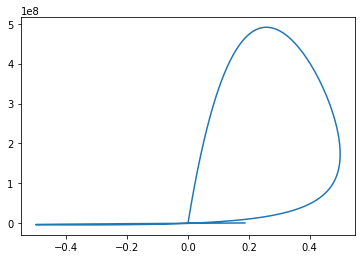

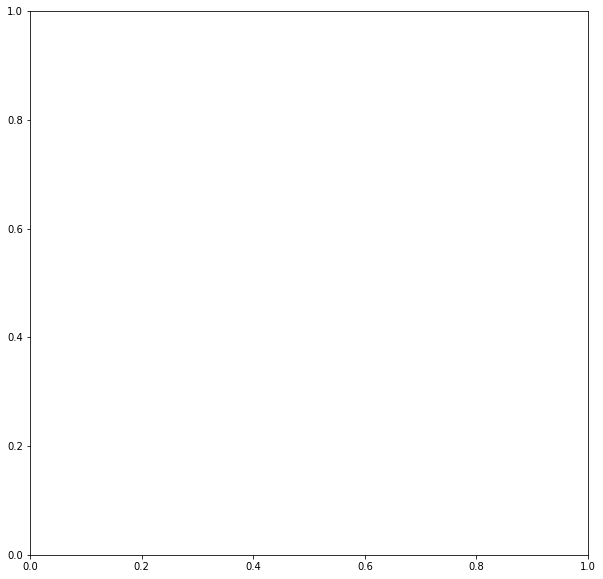

In [96]:
import matplotlib.pyplot as plt
import matplotlib as mpl
fig,ax=plt.subplots()
ax.plot(Strain4[:,0],Sigma4[:,0])


fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(t))
ax0.text(1.5,-0.1,"Strain_Stress curve ",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")

sns.heatmap(t,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()




















In [ ]:
plt.plot(Strain4[:,1],Sigma4[:,1])
plt.scatter(Strain4[:,1],Sigma4[:,1],c=t,cmap='YlGnBu')
plt.colorbar(label="Time [s]", orientation="vertical")
plt.title('Stress/Strain hysteresis, intermediate frequency loading',loc='center')
plt.savefig('LowFrequencyDAMAGE.jpg')
plt.show()


In [ ]:
plt.plot(t,Damage4)
plt.xlabel('Time [s]')
plt.ylabel('Damage')
plt.title('Evolution of damage for a low frequency loading')
plt.savefig('EVOLUTION_OF_DAMAGELOWFREQ')

In [ ]:
#test 
G0=3518.52*10**6
nb_nodes=3   
dt=0.1 #s
tf=10000#s
tol=10**-2
niter=10000     
l=1 #Lengh of the bar
nb_ddl_tot=3
nb_elem=2
nb_nodes_per_elem=2
conn=np.array([[0,1],[1,2]])
coord=np.array([[0],[1],[2]])*l
nu=0.35
E=9500
A=1
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
u0=np.sin(t/80)
F_ext=np.zeros((len(t),nb_nodes)) #force applie
blocades=np.zeros((nb_nodes,1),dtype=bool )
for i in range(len(blocades)):
    blocades[i]=False
blocades[0]=True
blocades[nb_nodes-1]=True
nb_ddl_tot=3
G=ComputeG(t,u0,G0,mu,lambd)
B1= 1.3955*10**-6
B2=0
r=0.9
k=0.02
G5,D5,U5,K5,Strain5,Sigma5,Damage5=ViscoElasticSolutionDamageMultipleElements(u0,G0,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem)

In [ ]:
plt.plot(t,Strain5[:,1])

In [ ]:
plt.plot(Strain5[:,1],Sigma5[:,1])
plt.scatter(Strain5[:,1],Sigma5[:,1],c=t,cmap='YlGnBu')
plt.colorbar(label="Time [s]", orientation="vertical")
plt.title('Stress/Strain hysteresis, intermediate frequency loading',loc='center')
plt.savefig('InterediateFrequencyDAMAGE.jpg')
plt.show()

In [ ]:
plt.plot(t,Damage5)
plt.xlabel('Time [s]')
plt.ylabel('Damage')
plt.title('Evolution of damage for an intermediate frequency cyclic loading')
plt.savefig('EVOLUTION_DAMAGE_INTFREQ.jpg')

In [ ]:
idx=np.logical_not((t<100)==False)
plt.plot(t[idx],Damage5[idx])

In [ ]:
#test 
G0=3518.52*10**6
nb_nodes=3   
dt=0.1 #s
tf=10000#s
tol=10**-2
niter=10000     
l=1 #Lengh of the bar
nb_ddl_tot=3
nb_elem=2
nb_nodes_per_elem=2
conn=np.array([[0,1],[1,2]])
coord=np.array([[0],[1],[2]])*l
nu=0.35
E=9500
A=1
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
u0=np.sin(t/40)
F_ext=np.zeros((len(t),nb_nodes)) #force applie
blocades=np.zeros((nb_nodes,1),dtype=bool )
for i in range(len(blocades)):
    blocades[i]=False
blocades[0]=True
blocades[nb_nodes-1]=True
nb_ddl_tot=3
G=ComputeG(t,u0,G0,mu,lambd)
B1= 1.3955*10**-6
B2=0
r=0.9
k=0.02
G6,D6,U6,K6,Strain6,Sigma6,Damage6=ViscoElasticSolutionDamageMultipleElements(u0,G0,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem)

In [ ]:
plt.plot(Strain6[:,1],Sigma6[:,1])
plt.scatter(Strain6[:,1],Sigma6[:,1],c=t,cmap='YlGnBu')
plt.colorbar(label="Time [s]", orientation="vertical")
plt.title('Stress/Strain hysteresis, high frequency loading',loc='center')
plt.savefig('HIGHFREQUENCYDAMAGE.jpg')
plt.show()


In [ ]:
plt.plot(t,Damage6[:,0])
plt.xlabel('Time [s]')
plt.ylabel('Damage')
plt.title('Evolution of damage for a high frequency loading')
plt.savefig('EvolDamageHIGHFREQLOAD.jpg')

In [ ]:
def EnergydissipationDamage(t,G0,dt,tf,tol,F_ext,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades): 
    Energydiss=[]
    omega=np.linspace(0,0.02,20)
    Strain_rate=np.zeros(len(t)-1)
    for i in range(len(omega)): 
        u0=np.sin(t*omega[i])
        G,D,U,K,Strain,Sigma,Damage=ViscoElasticSolutionDamageMultipleElements(u0,G0,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem)
        for j in range(len(t)-1):
            Strain_rate[j]=(Strain[j+1,0]-Strain[j,0])/dt ##Energy dissiipation
        Integral=integrate.simps(eta*np.square(Strain_rate),axis=0)
        Energydiss.append(Integral)
        
    return Energydiss,omega

Energydiss,omega=EnergydissipationDamage(t,G0,dt,tf,tol,F_ext,niter,nodes,mu,nu,lambd,E,A,l,quads,weights,blocades)


In [ ]:
plt.plot(omega,Energydiss)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Energy dissipation')
plt.title('Energy dissipation including damage')

# Creep test for 2 elements only left end embedded

In [ ]:
#test 
G0=3518.52*10**6
nb_nodes=3
u0=0#displacement at the end of the second element
dt=0.1 #s
tf=10000#s
tol=10**-2
niter=10000     
l=1 #Lengh of the bar
nb_ddl_tot=3
nb_elem=2
nb_nodes_per_elem=2
conn=np.array([[0,1],[1,2]])
coord=np.array([[0],[1],[2]])*l
nu=0.35
E=9500*10**6
A=1
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext=np.zeros((len(t),nb_nodes)) #force applie
F_ext[:,nb_nodes-1]=10**6
blocades=np.zeros((nb_nodes,1),dtype=bool )
for i in range(len(blocades)):
    blocades[i]=False
blocades[0]=True

nb_ddl_tot=3

B1= 1.3955*10**-6
B2=0
r=0.9
k=0.02
G7,D7,U7,K7,Strain7,Sigma7,Damage7=ViscoElasticSolutionDamageMultipleElements(u0,G0,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem)



In [ ]:
idx=np.logical_not((t<200)==False)
plt.plot(t,Damage7[:,0],'b',label='Damage in the first element')
plt.plot(t,Damage7[:,1],'r',label='Damage in the second element')
plt.xlabel('Time in s')
plt.ylabel('Damage ')
plt.title('Evolution of damage in both elements during a creep test')
plt.savefig('MNT4.jpg')
plt.legend()

In [ ]:
plt.plot(t,Sigma7[:,0]/10**6,'r',label='Stress in the first element')
plt.plot(t,Sigma7[:,1]/10**6,'b',label='Stress in the second element')
plt.xlabel('Time [s]')
plt.ylabel('Stress [Mpa]')
plt.title('Equillibrium of stress between both elements')
plt.savefig('MNT5.jpg')
plt.legend()


In [ ]:
plt.plot(t,Strain7[:,0],'r',label='Strain in the first element')
plt.plot(t,Strain7[:,1],'b',label='Strain in the second element')
plt.xlabel('Time in s')
plt.ylabel('Strain')
plt.title('Strain evolution in both elements during a creep test')
plt.savefig('MNT6.jpg')
plt.legend()


In [ ]:
l=1
x1=np.linspace(0,l,len(t)-1)
x2=np.linspace(l,2*l,len(t)-1)
Strain_plot1=np.ones((len(t)-1))*Strain7[1,0]
Strain_plot2=np.ones((len(t)-1))*Strain7[1,1]
plt.plot(x1,Strain_plot1,label='Embedded element')
plt.plot(x2,Strain_plot2,label='Element subject to the force')
plt.legend()
plt.xlabel('X [m]')
plt.ylabel('Strain')
plt.title('Strain distribution in both elements at t=50 s.')
plt.savefig('MNT7.jpg')

In [ ]:
l=1
x1=np.linspace(0,l,len(t))
x2=np.linspace(l,2*l,len(t))
Strain_plot1=np.ones((len(t)))*Damage7[1000,0]
Strain_plot2=np.ones((len(t)))*Damage7[1000,1]
plt.plot(x1,Strain_plot1,label='Embedded element')
plt.plot(x2,Strain_plot2,label='Element subject to the force')
plt.legend()
plt.xlabel('X [m]')
plt.ylabel('Strain')
plt.title('Strain distribution in both elements at t=50 s.')
plt.savefig('MNT7.jpg')


In [ ]:
fig = plt.figure()
from mpl_toolkits import mplot3d
t=np.linspace(1,tf,int(tf/dt))
ax = plt.axes(projection ='3d')
ax.plot(x1,t,Damage7[:,0])

# Relaxation test for 2 elements with the left one embedded

In [ ]:
G0=3518.52*10**6
nb_nodes=3
u0=6*10**-4

dt=0.1 #s
tf=10000 #s
tol=10**-2
niter=10000     
l=1 
nb_ddl_tot=3
nb_elem=2
nb_nodes_per_elem=2
conn=np.array([[0,1],[1,2]])
coord=np.array([[0],[1],[2]])*l

nu=0.35
E=9500*10**6
A=1
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext=np.zeros((len(t),nb_nodes))
blocades=np.zeros((nb_nodes,1),dtype=bool )
for i in range(len(blocades)):
    blocades[i]=False
blocades[0]=True
blocades[nb_nodes-1]=True

G8,D8,U8,K8,Strain8,Sigma8,Damage8=ViscoElasticSolutionDamageMultipleElements(u0,G0,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem)



In [ ]:
l=1
x1=np.linspace(0,l,len(t)-1)
x2=np.linspace(l,2*l,len(t)-1)
Strain_plot1=np.ones((len(t)-1))*Strain8[1,0]
Strain_plot2=np.ones((len(t)-1))*Strain8[1,1]
plt.plot(x1,Strain_plot1,label='Embedded element')
plt.plot(x2,Strain_plot2,label='Element subject to the displacement')
plt.legend()
plt.xlabel('X [m]')
plt.ylabel('Strain')
plt.title('Strain distribution in both elements at t=50 s.')
plt.savefig('MNT7.jpg')

In [ ]:
l=1
x1=np.linspace(0,l,len(t)-1)
x2=np.linspace(l,2*l,len(t)-1)
Strain_plot1=np.ones((len(t)-1))*Damage8[1,0]
Strain_plot2=np.ones((len(t)-1))*Damage8[1,1]
plt.plot(x1,Strain_plot1,label='Embedded element')
plt.plot(x2,Strain_plot2,label='Element subject to the displacement')
plt.legend()
plt.xlabel('X [m]')
plt.ylabel('Strain')
plt.title('Damage distribution in both elements at t=50 s.')
plt.savefig('MNT7.jpg')

## Force in the middle for 2 elements both ends embeded

In [ ]:
#test 
G0=3518.52*10**6
nb_nodes=3
u0=0#displacement at the end of the second element
dt=0.1 #s
tf=10000 #s
tol=10**-2
niter=10000     
l=1 #Lengh of the bar
nb_ddl_tot=3
nb_elem=2
nb_nodes_per_elem=2
conn=np.array([[0,1],[1,2]])
coord=np.array([[0],[1],[2]])*l
nu=0.35
E=9500*10**6
A=1
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext=np.zeros((len(t),nb_nodes)) #force applie
F_ext[:,int(nb_nodes/2)]=10**6
blocades=np.zeros((nb_nodes,1),dtype=bool )
for i in range(len(blocades)):
    blocades[i]=False
blocades[0]=True
blocades[nb_nodes-1]=True

nb_ddl_tot=3

G9,D9,U9,K9,Strain9,Sigma9,Damage9=ViscoElasticSolutionDamageMultipleElements(u0,G0,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem)

plt.plot(t,Damage9[:,0],'b',label='Damage in the first element')
plt.plot(t,Damage9[:,1],'r',label='Damage in the second element')
plt.title('Evolution of damage for both embedded elements')
plt.xlabel('Time in s')
plt.ylabel('Damage ')
plt.legend()
plt.savefig('mnt8.jpg')


In [ ]:
plt.plot(t,Sigma9[:,0]/10**6,'r',label='Stress in the first element')
plt.plot(t,Sigma9[:,1]/10**6,'b',label='Stress in the second element')
plt.xlabel('Time [s]')
plt.ylabel('Stress [Mpa]')
plt.title('Evolution of stress for both embedded elements with a force in the middle node')
plt.legend()
plt.savefig('mnt9.jpg')


In [ ]:
plt.plot(t,Strain9[:,0],'r',label='Strain in the first element')
plt.plot(t,Strain9[:,1],'b',label='Strain in the second element')
plt.xlabel('Time [s]')
plt.ylabel('Stress [Mpa]')
plt.title('Evolution of strain for both embedded elements with a force in the middle node')
plt.legend()
plt.savefig('mnt9.jpg')

In [ ]:
l=1
x1=np.linspace(0,l,len(t)-1)
x2=np.linspace(l,2*l,len(t)-1)
Strain_plot1=np.ones((len(t)-1))*Strain9[1,0]
Strain_plot2=np.ones((len(t)-1))*Strain9[1,1]
plt.plot(x1,Strain_plot1,label='Element in tension')
plt.plot(x2,Strain_plot2,label='Element in compression')
plt.legend()
plt.xlabel('X [m]')
plt.ylabel('Strain')
plt.title('Strain distribution in both elements at t=50 s.')
plt.savefig('MNT7.jpg')

## Force in the middle for 4 elements both ends embeded


In [ ]:
#test 
G0=3518.52*10**6
nb_nodes=5
u0=0#displacement at the end of the second element
dt=50 #s
tf=10000 #s
tol=10**-2
niter=10000     
l=1 #Lengh of the bar
nb_ddl_tot=5
nb_elem=4
nb_nodes_per_elem=2
conn=np.array([[0,1],[1,2],[2,3],[3,4]])
coord=np.array([[0],[1],[2],[3],[4]])*l
nu=0.35
E=9500*10**6
A=1
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext=np.zeros((len(t),nb_nodes)) #force applie
F_ext[:,int(nb_nodes/2)]=10**6
blocades=np.zeros((nb_nodes,1),dtype=bool )
for i in range(len(blocades)):
    blocades[i]=False
blocades[0]=True
blocades[nb_nodes-1]=True

nb_ddl_tot=5

G11,D11,U11,K11,Strain11,Sigma11,Damage11=ViscoElasticSolutionDamageMultipleElements(u0,G0,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem)
idx=np.logical_not((t<200)==False)
plt.plot(t,Damage11[:,0],'b',label='Damage in the first element')
plt.plot(t,Damage11[:,2],'r',label='Damage in the third element')
plt.title('Damage evolution for a bar in traction and a bar in compression' )
plt.legend()







In [ ]:
plt.plot(t,Sigma11[:,1],'r',label='Stress in the first element')
plt.plot(t,Sigma11[:,2],'b',label='Stress in the third element')
plt.title('Evolution of stress for the two middle elements ')
plt.legend()


In [ ]:
plt.plot(t,Strain11[:,0],'r',label='Strain in the first element')
plt.plot(t,Strain11[:,2],'b',label='Strain in the third element')
plt.xlabel('Time in s')
plt.ylabel('Strain')
plt.title('Evolution of strain for the two middle elements ')
plt.legend()

In [ ]:
l=1
x1=np.linspace(0,l,len(t)-1)
x2=np.linspace(l,2*l,len(t)-1)
x3=np.linspace(2*l,3*l,len(t)-1)
x4=np.linspace(3*l,4*l,len(t)-1)
Strain_plot1=np.ones((len(t)-1))*Strain11[1,0]
Strain_plot2=np.ones((len(t)-1))*Strain11[1,1]
Strain_plot3=np.ones((len(t)-1))*Strain11[1,2]
Strain_plot4=np.ones((len(t)-1))*Strain11[1,3]
plt.plot(x1,Strain_plot1,label='Element 1')
plt.plot(x2,Strain_plot2,label='Element 2')
plt.plot(x3,Strain_plot3,label='Element 3')
plt.plot(x4,Strain_plot4,label='Element 4')

plt.legend()
plt.xlabel('X [m]')
plt.ylabel('Strain')
plt.title('Piecewise distribution of the strain in the four elements at time t=50 s')
plt.savefig('MNNNT.jpg')

In [ ]:
l=1
x1=np.linspace(0,l,len(t)-1)
x2=np.linspace(l,2*l,len(t)-1)
x3=np.linspace(2*l,3*l,len(t)-1)
x4=np.linspace(3*l,4*l,len(t)-1)
Strain_plot1=np.ones((len(t)-1))*Damage11[3,0]
Strain_plot2=np.ones((len(t)-1))*Damage11[3,1]
Strain_plot3=np.ones((len(t)-1))*Damage11[3,2]
Strain_plot4=np.ones((len(t)-1))*Damage11[3,3]
plt.plot(x1,Strain_plot1,label='Element 1')
plt.plot(x2,Strain_plot2,label='Element 2')
plt.plot(x3,Strain_plot3,label='Element 3')
plt.plot(x4,Strain_plot4,label='Element 4')

plt.legend()
plt.xlabel('X [m]')
plt.ylabel('Strain')
plt.title('Piecewise distribution of the strain in the four elements at time t=50 s')
plt.savefig('MNNNT.jpg')


## Outer iteration: Equilibrium Equation solution$



In [ ]:
def ComputeSigmadevSim(G0,strain,mu,lambd,dt,tf,dim): 
    N=int(tf/dt)
    G=ComputeG(G0,dt,tf,mu,lambd)
    straindev=strain 
    hm=np.zeros(strain.shape)
    sigmadev=np.zeros(strain.shape)
    dhm=np.zeros(strain.shape)
                
    dhm[i]=((straindev[i]-straindev[i-1])*lambd/dt)*(1-exp(-dt/lambd))    #dt is the difference between tm and tm-1
    hm[i]=(((straindev[i-1]-straindev[0])*lambd/t[i-1])*(1-exp(-t[i-1]/lambd)))*exp(-dt/lambd)+dhm[i]
    sigmadev[i]=2*G[i]*(mu*straindev[i]+mu*straindev[0]+mu*exp(-t[i]/lambd))*straindev[0]+hm[i]
   
    return sigmadev

## Computation  of the damage for a force that we apply --> Initial try to see how it works

In [ ]:
def ViscoElasticSolution1DamageNonlinear(G0,dt,tf,tol,kcrit,F_ext,B1,B2,r,k,niter,nodes,mu,nu,lambd,E,A,quads,weights):
    K_modulus=E/(3*(1-2*nu)) 
    t=np.linspace(1,tf,int(tf/dt))
    U=np.zeros((len(t),2)) #Big Matrix: each row is the displacement at each node at time t
    Damage=np.zeros((len(t),1))
    Damage[0]=0
    u0=0.0
    if type(u0)==float:
        U[0,1]=u0 #First row--> First displacement (if we impose a displacement this row is non zero)
    else: 
        U[0,1]=u0[0]
    G=np.zeros((len(t),1)) #Vector of G where at each time step we have a new G as G is time dependent
    D=np.zeros((len(t),1))
    G[0]=G0 #Given in the paper
    lambd_lamé=np.zeros((len(t),1)) #Lamé coefficient--> Going to appear in our constitutive model, time dependant
    lambd_lamé[0]=K_modulus-(2/3)*G[0]#constitutive model, time dependent 
    K=ComputeK1D(quads,weights,nodes,D[0],l)
    D[0]=lambd_lamé[0]+2*G[0] #initial constitutive model
    B,J=FiniteElement1D(quads,nodes,l) #Matrix B and jacobian with gauss points
    Strain=np.zeros((len(t),1)) #at each time t we have a new strain because we have a new displacement
    Strain[0]=B@U[0,:] #Initial strain
    Sigma=np.zeros((len(t),1))
    if F_ext[0,1]>0:
        Sigma[0]=F_ext[0,1]/A
    free = np.logical_not(blocades).ravel()
    for i in range(1,len(t)):
        R_norm=2*tol
        k=0
        G[i]=G0*(mu+mu*exp(-t[i]/lambd))
        lambd_lamé[i]=K_modulus-(2/3)*G[i] #update lamé coef
        D[i]=lambd_lamé[i]+2*G[i] 
        if Sigma[i-1]>=0:
            if Damage[i-1]<0.9:
                Damage[i]=Damage[i-1]+(dt*B_parameter*Sigma[i-1]**r/(1-Damage[i-1])**k)*10**-6
            else: 
                Damage[i]=Damage[i-1]
        else: 
            Damage[i]=Damage[i-1]
        if Damage[i]>=1:
            Damage[i]=0.99   
        while R_norm>tol and k<niter:
            R=F_ext[i-1,free]-K[:,free][free,:]*U[i-1,free]
            du=(1/(K[:,free][free,:]))*R
            U[i,free]=U[i-1,free]+du
            K=(1-Damage[i])*ComputeK1D(quads,weights,nodes,D[i],l)
            R=F_ext[i,free]-K[:,free][free,:]*U[i,free]
            R_norm=np.abs(R)
            k+=1
            if k>kcrit:
                dt=dt/2
        Strain[i]=B@U[i,:]
        Sigma[i]=D[i]*Strain[i]
        B_parameter=B1+B2*Sigma[i]
        
   
    return G,D,U,K,Strain,Sigma,Damage,dt

In [ ]:
A=np.zeros((1,2))
A.reshape(-1,1).shape

In [ ]:
def ComputeKDamage(quads,weights,coord,D,l): 
    nodes=coord
    K_local=np.zeros((2,2))
    B,J=FiniteElement1D(quads,nodes,l)
    K_local=K_local+weights*J*B.T@B
    
    Kl=K_local*D
    return Kl
def AssembleStiffnessDamage(D,coord, conn, nb_elem, nb_ddl_tot,quads,weights,l,Damage_param):
    K = np.zeros((nb_ddl_tot, nb_ddl_tot))
    for e in range(nb_elem):
        conn_element=conn[e,:]
        nodes = coord[conn_element.ravel()]
        Damage_row=Damage_param.reshape(-1,1)
        Dam=D.reshape(-1,1)
        Kl = ComputeKDamage(quads,weights,coord,Dam[e],l)*(1-Damage_row[e])
        for i in range(2):
                for j in range(2):
                    K[e+i, e+j] = K[e+i, e+j] + Kl[i, j]
    return K

In [ ]:
def ViscoElasticSolutionDamageMultipleElementsNonLinear(u0,G0,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem):
    K_modulus=E/(3*(1-2*nu)) #Bulk modulus: not time dependant
    t=np.linspace(1,tf,int(tf/dt))
    U=np.zeros((len(t),nb_nodes)) #Big Matrix: each row is the displacement at each node at time t
    B_parameter=np.zeros((nb_elem,1))
    U[:,nb_nodes-1]=0
    G=np.zeros((len(t),nb_elem)) #Vector of G where at each time step we have a new G as G is time dependent
    D=np.zeros((len(t),nb_elem))
    Damage=np.zeros((len(t),nb_elem))
    G[0,:]=G0 #Given in the paper
    G[0,3]=G0/100
    lambd_lamé=np.zeros((len(t),nb_elem)) #Lamé coefficient--> Going to appear in our constitutive model, time dependant
    lambd_lamé[0,:]=K_modulus-(2/3)*G[0,:]#constitutive model, time dependent 
    D[0,:]=lambd_lamé[0,:]+2*G[0,:] #initial constitutive model
    Damage[0,:]=np.zeros((1,nb_elem))
    K=AssembleStiffnessDamage(D[0,:],coord, conn, nb_elem, nb_ddl_tot,quads,weights,l,Damage[0,:])
    B,J=FiniteElement1D(quads,nodes,l) #Matrix B and jacobian with gauss points
    Strain=np.zeros((len(t),nb_elem))#at each time t we have a new strain because we have a new displacement
    Strain[0,:]=Strain1DMultipleElements(U[0,:],conn,coord,l)
    Sigma=np.zeros((len(t),nb_elem))
    Sigma[0,:]=D[0,:]*Strain[0,:]
        

    free=np.logical_not(blocades).ravel()
    imposed=np.logical_not(blocades==False).ravel()
    
    for i in range(1,len(t)):
        R_norm=2*tol
        G[i,:]=G[0,:]*((1-mu)+mu*np.exp(-t[i]/lambd))
        lambd_lamé[i,:]=K_modulus-(2/3)*G[i,:] #update lamé coef
        D[i,:]=lambd_lamé[i,:]+2*G[i,:] 
        for j in range(nb_elem):
            if Sigma[i-1,j]>=0:
                if Damage[i-1,j]<1:
                    B_parameter[j]=B1+B2*Sigma[i-1,j]
                    Damage[i,j]=Damage[i-1,j]+(dt*B_parameter[j]*Sigma[i-1,j]**r/(1-Damage[i-1,j])**k)*10**-6
                    
                else: 
                    Damage[i,j]=Damage[i-1,j]
            else: 
                Damage[i,j]=Damage[i-1,j]
            if Damage[i,j]>0.8:
                Damage[i,j]=0.8
            else: 
                Damage[i,j]=Damage[i,j]
        K=AssembleStiffnessDamage(D[i,:],coord, conn, nb_elem, nb_ddl_tot,quads,weights,l,Damage[i,:]) #update matrix K at time t 
        
        while R_norm>tol and k<niter:
            R=F_ext[i,free]-K[free,:][:,free]@U[i,free]
            du=np.linalg.inv(K[free,:][:,free])@R
            U[i,free]=U[i,free]+du
            R=F_ext[i,free]-K[free,:][:,free]@U[i,free]
            R_norm=np.linalg.norm(R)
            k+=1
            if k>kcrit:
                dt=dt/2
        
        Strain[i,:]=Strain1DMultipleElements(U[i,:],conn,coord,l)
        Sigma[i,:]=D[i,:]*Strain[i,:]
        
        
                
    
 
        
    return G,D,U,K,Strain,Sigma,Damage

In [ ]:

G0=3518.52*10**6
nb_nodes=7
u0=0#displacement at the end of the second element
dt=1 #s
tf=1000#s
tol=10**-2
niter=1000     
l=1 #Lengh of the bar
nb_ddl_tot=7
nb_elem=6
nb_nodes_per_elem=2
conn=np.array([[0,1],[1,2],[2,3],[3,4],[4,5],[5,6]])
coord=np.array([[0],[1],[2],[3],[4],[5],[6]])
nu=0.35
E=9500*10**6
A=1
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext=np.zeros((len(t),nb_nodes))
F_ext[:,nb_nodes-1]=10**6#force applie
blocades=np.zeros((nb_nodes,1),dtype=bool )
blocades[0]=True


nb_ddl_tot=7


kcrit=niter/2


B1= 1.3955*10**-6
B2=0
r=0.9
k=0.02

G,D,U,K,Strain,Sigma,Damage=ViscoElasticSolutionDamageMultipleElementsNonLinear(u0,G0,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem)












In [ ]:
Damage.shape

In [ ]:
G0=3518.52*10**6
K_modulus=E/(3*(1-2*nu))
G0_func= lambda x: G0*(1-x/2) 
G_FCT= lambda x,t: G0_func(x)*(1-mu+mu*np.exp(-t/lambd))
lambd_lamé=lambda x,t:K_modulus-(2/3)*G_FCT(x,t) #update lamé coef
D_FCT= lambda x,t: 2*G_FCT(x,t)+lambd_lamé(x,t)
Sigma= lambda x,t: D_FCT(x,t)*Strain
x=np.linspace(0,1,len(t))
B_parameter=lambda x,t: B1+B2*Sigma(x,t)




In [ ]:
def ComputeDamagePlot(Damage,x,t):
    Damage_plot=np.zeros((len(t),len(t)))
    nb_elem=Damage.shape[1]
    A=0
    while A<=nb_elem-1:
        for i,Xi in enumerate(x):
            if Xi<=6:
                Damage_plot[:,i]=Damage[:,A]
        A+=1
    return Damage_plot
    

In [ ]:
x=np.linspace(0,6,len(t))
Damage2=Damage
Damage2[:,3]=Damage[:,3]*2
Dam_plot=ComputeDamagePlot(Damage,x,t)
Dam_plot.shape

In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 


x=np.linspace(0,6,len(t))
y=t
X,Y=np.meshgrid(x,y)
Z=Damage[30]


# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating color map
my_cmap = plt.get_cmap('hot')
 
# Creating plot
surf = ax.plot_surface(X, Y, Z,
                       cmap = my_cmap,
                       edgecolor ='none')
 
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
 
ax.set_title('Evolution of damage with time and length')
ax.set_xlabel('X [m]')

ax.set_ylabel('Time [s]')
plt.savefig('DamageEVOLUTION3D_GlinearlyVariable')

plt.show()


In [ ]:
def ComputeDamagePlot(Damage,x,t):
    Damage_plot=np.zeros((len(t),len(t)))
    nb_elem=Damage.shape[1]
    A=0
    while A<=nb_elem-1:
        for i,Xi in enumerate(x):
            if Xi<A+1:
                Damage_plot[:,i]=Damage[:,A]
        A+=1
    return Damage_plot
A=ComputeDamagePlot(Damage,x,t)


In [ ]:
def GenerateCoordinatesAndConn(nb_elem,nb_nodes):
    Coord=np.zeros((nb_nodes,1))
    Conn=np.zeros((nb_elem,2))
    for i in range(nb_nodes):
        Coord[i]=i
    for j in range(nb_elem):   
        Conn[j,:]=[j,j+1]
    
    return Coord,Conn
        
        
Coord,Conn=GenerateCoordinatesAndConn(6,7)
    

In [ ]:
coorde= Coord.astype(int)
conne=Conn.astype(int)

In [ ]:
    
G0=3518.52*10**6
nb_nodes=7
u0=0#displacement at the end of the second element
dt=1 #s
tf=1000#s
tol=10**-2
niter=1000     
l=1 #Lengh of the bar
nb_ddl_tot=7
nb_elem=6
nb_nodes_per_elem=2
conn=conne
coord=coorde
nu=0.35
E=9500*10**6
A=1
quads=0
weights=2

lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext=np.zeros((len(t),nb_nodes))
F_ext[:,nb_nodes-1]=10**7#force applie
blocades=np.zeros((nb_nodes,1),dtype=bool )
blocades[0]=True


nb_ddl_tot=7


kcrit=niter/2


B1= 1.3955*10**-6
B2=0
r=0.9
k=0.02

G,D,U,K,Strain,Sigma,Damage=ViscoElasticSolutionDamageMultipleElementsNonLinear(u0,G0,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem)



In [ ]:
def ViscoElasticSolutionDamageMultipleElementsNonLinear(u0,G0,pos,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem):
    K_modulus=E/(3*(1-2*nu)) #Bulk modulus: not time dependant
    t=np.linspace(1,tf,int(tf/dt))
    U=np.zeros((len(t),nb_nodes)) #Big Matrix: each row is the displacement at each node at time t
    B_parameter=np.zeros((nb_elem,1))
    U[:,nb_nodes-1]=0
    G=np.zeros((len(t),nb_elem)) #Vector of G where at each time step we have a new G as G is time dependent
    D=np.zeros((len(t),nb_elem))
    Damage=np.zeros((len(t),nb_elem))
    G[0,:]=G0 
    G[0,pos]=G0/100
    lambd_lamé=np.zeros((len(t),nb_elem)) #Lamé coefficient--> Going to appear in our constitutive model, time dependant
    lambd_lamé[0,:]=K_modulus-(2/3)*G[0,:]#constitutive model, time dependent 
    D[0,:]=lambd_lamé[0,:]+2*G[0,:] #initial constitutive model
    Damage[0,:]=np.zeros((1,nb_elem))
    K=AssembleStiffnessDamage(D[0,:],coord, conn, nb_elem, nb_ddl_tot,quads,weights,l,Damage[0,:])
    B,J=FiniteElement1D(quads,nodes,l) #Matrix B and jacobian with gauss points
    Strain=np.zeros((len(t),nb_elem))#at each time t we have a new strain because we have a new displacement
    Strain[0,:]=Strain1DMultipleElements(U[0,:],conn,coord,l)
    Sigma=np.zeros((len(t),nb_elem))
    Sigma[0,:]=D[0,:]*Strain[0,:]
        

    free=np.logical_not(blocades).ravel()
    imposed=np.logical_not(blocades==False).ravel()
    
    for i in range(1,len(t)):
        R_norm=2*tol
        G[i,:]=G[0,:]*((1-mu)+mu*np.exp(-t[i]/lambd))
        lambd_lamé[i,:]=K_modulus-(2/3)*G[i,:] #update lamé coef
        D[i,:]=lambd_lamé[i,:]+2*G[i,:] 
        for j in range(nb_elem):
            if Sigma[i-1,j]>=0:
                if Damage[i-1,j]<1:
                    B_parameter[j]=B1+B2*Sigma[i-1,j]
                    Damage[i,j]=Damage[i-1,j]+(dt*B_parameter[j]*Sigma[i-1,j]**r/(1-Damage[i-1,j])**k)*10**-6
                    
                else: 
                    Damage[i,j]=Damage[i-1,j]
            else: 
                Damage[i,j]=Damage[i-1,j]
            if Damage[i,j]>0.8:
                Damage[i,j]=0.8
            else: 
                Damage[i,j]=Damage[i,j]
        K=AssembleStiffnessDamage(D[i,:],coord, conn, nb_elem, nb_ddl_tot,quads,weights,l,Damage[i,:]) #update matrix K at time t 
        
        while R_norm>tol and k<niter:
            R=F_ext[i,free]-K[free,:][:,free]@U[i,free]
            du=np.linalg.inv(K[free,:][:,free])@R
            U[i,free]=U[i,free]+du
            R=F_ext[i,free]-K[free,:][:,free]@U[i,free]
            R_norm=np.linalg.norm(R)
            k+=1
            if k>kcrit:
                dt=dt/2
        
        Strain[i,:]=Strain1DMultipleElements(U[i,:],conn,coord,l)
        Sigma[i,:]=D[i,:]*Strain[i,:]
        
        
                
    
 
        
    return G,D,U,K,Strain,Sigma,Damage

In [ ]:
G0=3518.52*10**6
nb_nodes=7
u0=0#displacement at the end of the second element
dt=1 #s
tf=1000#s
tol=10**-2
niter=1000     
l=1 #Lengh of the bar
nb_ddl_tot=7
nb_elem=6
nb_nodes_per_elem=2
conn=np.array([[0,1],[1,2],[2,3],[3,4],[4,5],[5,6]])
coord=np.array([[0],[1],[2],[3],[4],[5],[6]])
nu=0.35
E=9500*10**6
A=1
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext=np.zeros((len(t),nb_nodes))
F_ext[:,nb_nodes-1]=10**6#force applie
blocades=np.zeros((nb_nodes,1),dtype=bool )
blocades[0]=True


nb_ddl_tot=7


kcrit=niter/2


B1= 1.3955*10**-6
B2=0
r=0.9
k=0.02

G,D,U,K,Strain,Sigma,Damage=ViscoElasticSolutionDamageMultipleElementsNonLinear(u0,G0,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem)



In [ ]:
Damage[900,4]/Damage[900,5]

In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
z=Damage[500,:]
x=np.linspace(0,6,6)
fig = plt.figure()
ax = fig.gca(projection='3d')
Y=t[900]*np.ones((6,1))
X=x
z2=Damage[500,:]
Y2=t[900]*np.ones((6,1))

z3=Damage[200,:]
Y3=t[200]*np.ones((6,1))

plt.plot(X,Y,z)
plt.plot(X,Y2,z2)
plt.plot(X,Y3,z3)


plt.show() 


In [ ]:
plt.plot(t,Strain[:,0],label='First element')
plt.plot(t,Strain[:,1],label='Second element')
plt.xlabel('Time [s]')
plt.ylabel('Strain [-]')
plt.title('Evolution of strain creep test ')
plt.legend()
plt.savefig('Strain, creep test.jpg')
fig,ax=plt.subplots()
ax.plot(t,Damage[:,0],label='First element')
ax.plot(t,Damage[:,0],label='Second element')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Damage')
ax.legend()
ax.set_title('Evolution of damage during a creep test')
plt.savefig('Damage, creep test.jpg')
Strain

In [ ]:
l=1
x1=np.linspace(0,l,len(t)-1)
x2=np.linspace(l,2*l,len(t)-1)
Strain_plot1=np.ones((len(t)-1))*Strain[999,1]
Strain_plot2=np.ones((len(t)-1))*Strain[999,1]
plt.plot(x1,Strain_plot1,label='Embedded element')
plt.plot(x2,Strain_plot2,label='Element subject to the force')
plt.legend()
plt.xlabel('X [m]')
plt.ylabel('Strain')
plt.title('Strain distribution in both elements at t=tf')
plt.savefig('MNT7.jpg')

In [ ]:
l=1
x1=np.linspace(0,l,len(t)-1)
x2=np.linspace(l,2*l,len(t)-1)
Strain_plot1=np.ones((len(t)-1))*Damage[999,0]*10**3
Strain_plot2=np.ones((len(t)-1))*Damage[999,0]*10**3
plt.plot(x1,Strain_plot1,label='Embedded element')
plt.plot(x2,Strain_plot2,label='Element subject to the force')
plt.legend()
plt.xlabel('X [m]')
plt.ylabel('Damage')
plt.title('Damage distribution in both elements at t=tf')
plt.savefig('MNT6.jpg')

In [ ]:
l=1
x1=np.linspace(0,l,len(t)-1)
x2=np.linspace(l,2*l,len(t)-1)
Strain_plot1=np.ones((len(t)-1))*Damage[999,0]*10**3
Strain_plot2=np.ones((len(t)-1))*Damage[998,0]*10**3
plt.plot(x1,Strain_plot1,label='Embedded element')
plt.plot(x2,Strain_plot2,label='Element subject to the force')
plt.legend()
plt.xlabel('X [m]')
plt.ylabel('Damage')
plt.title('Damage distribution in both elements at t=tf')
plt.savefig('MNT7.jpg')

In [ ]:
G0=3518.52*10**6
nb_nodes=3
u0=0#displacement at the end of the second element
dt=10 #s
tf=10000 #s
tol=10**-2
niter=1000     
l=1 #Lengh of the bar
nb_ddl_tot=3
nb_elem=2
nb_nodes_per_elem=2
conn=np.array([[0,1],[1,2]])
coord=np.array([[0],[1],[2]])
nu=0.35
E=9500*10**6
A=1
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext=np.zeros((len(t),nb_nodes))
F_ext[:,nb_nodes-2]=10**6#force applie
blocades=np.zeros((nb_nodes,1),dtype=bool )
blocades[0]=True
blocades[nb_nodes-1]=True

nb_ddl_tot=3


kcrit=niter/2


B1= 1.3955*10**-6
B2=0
r=0.9
k=0.02

G,D,U,K,Strain,Sigma,Damage=ViscoElasticSolutionDamageMultipleElementsNonLinear(u0,G0,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem)








In [ ]:
plt.plot(t,Strain[:,0],label='First element')
plt.plot(t,Strain[:,1],label='Second element')
plt.xlabel('Time [s]')
plt.ylabel('Strain [-]')
plt.title('Evolution of strain in both elements for a force in the middle ')
plt.legend()
plt.savefig('Strain, force in the middle.jpg')
fig,ax=plt.subplots()
ax.plot(t,Damage[:,0],label='Tenssed element')
ax.plot(t,Damage[:,1],label='Compressed element')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Damage')
plt.title('Evolution of damage in both elemnets, force for the middle')
ax.legend()
plt.savefig('Damage, force in the middle.jpg')

In [ ]:
l=1
x1=np.linspace(0,l,len(t)-1)
x2=np.linspace(l,2*l,len(t)-1)
Strain_plot1=np.ones((len(t)-1))*Strain[1,0]
Strain_plot2=np.ones((len(t)-1))*Strain[1,1]
plt.plot(x1,Strain_plot1,label='Element in tension')
plt.plot(x2,Strain_plot2,label='Element in compression')
plt.legend()
plt.xlabel('X [m]')
plt.ylabel('Strain')
plt.title('Piecewise distribution of strain in both elements at t=50 s.')
plt.savefig('MNT7.jpg')

## Semi analytical convolution time integration scheme

In [ ]:
def FiniteElement1D(x,nodes,l):
    N1s=-1/2
    N2s=1/2
    J = l/2
    B=(1/J)*np.array([[N1s,N2s]])
    return B,J


    
def ComputeKDamageGAUSS(quads,weights,coord,conn_elem,Del,A,l): 
    nodes=coord[conn_elem.ravel(),:]
    K_local=np.zeros((2,2))
    for i in range(len(quads)):
        for j in range(len(weights)):
            B,J=FiniteElement1D(quads[i],nodes,l)
            K_local+=weights[j]*A*J*B.T@B
            Kl=K_local*Del
    return Kl

def AssembleStiffnessDamageGAUSS(D,coord, conn, nb_elem, nb_ddl_tot,quads,weights,A,l,Damage_param):
    K = np.zeros((nb_ddl_tot, nb_ddl_tot))
    for e in range(nb_elem):
        conn_element=conn[e,:]
        nodes = coord[conn_element.ravel()]
        
        Kl = ComputeKDamage(quads,weights,coord,conn_element,D,A,l)*(1-D_param[e])
        for i in range(2):
                for j in range(2):
                    K[e+i, e+j] = K[e+i, e+j] + Kl[i, j]
    return K


In [ ]:
def ComputeKDamage(quads,weights,coord,D,l,A): 
    nodes=coord
    K_local=np.zeros((2,2))
    B,J=FiniteElement1D(quads,nodes,l)
    K_local=K_local+weights*J*B.T@B
    Kl=K_local*D*A
    return Kl
def AssembleStiffnessDamage(D,coord, conn, nb_elem, nb_ddl_tot,quads,weights,A,l,Damage_param):
    K = np.zeros((nb_ddl_tot, nb_ddl_tot))
    for e in range(nb_elem):
        conn_element=conn[e,:]
        nodes = coord[conn_element.ravel()]
        Damage_row=Damage_param.reshape(-1,1)
        Kl = ComputeKDamage(quads,weights,coord,D,l,A)*(1-Damage_param[e])
        for i in range(2):
                for j in range(2):
                    K[e+i, e+j] = K[e+i, e+j] + Kl[i, j]
    return K

 With Newton, no imperfection

In [ ]:
def ViscoElasticSolutionDamageMultipleElementsNonLinear(u0,G0,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem):
    K_modulus=E/(3*(1-2*nu)) #Bulk modulus: not time dependant
    t=np.linspace(1,tf,int(tf/dt))
    U=np.zeros((len(t),nb_nodes)) #Big Matrix: each row is the displacement at each node at time t
    B_parameter=np.zeros((nb_elem,1))
    U[:,nb_nodes-1]=u0
    G=np.zeros((len(t),1)) #Vector of G where at each time step we have a new G as G is time dependent
    D=np.zeros((len(t),1))
    Damage=np.zeros((len(t),nb_elem))
    G[0]=G0 #Given in the paper
    lambd_lamé=np.zeros((len(t))) #Lamé coefficient--> Going to appear in our constitutive model, time dependant
    lambd_lamé[0]=K_modulus-(2/3)*G[0]#constitutive model, time dependent 
    D[0]=lambd_lamé[0]+2*G[0] #initial constitutive model
    Damage[0,:]=np.zeros((1,nb_elem))
    K=AssembleStiffnessDamage(D[0],coord, conn, nb_elem, nb_ddl_tot,quads,weights,A,l,Damage[0,:])
    B,J=FiniteElement1D(quads,nodes,l) #Matrix B and jacobian with gauss points
    Strain=np.zeros((len(t),nb_elem))#at each time t we have a new strain because we have a new displacement
    Strain[0,:]=Strain1DMultipleElements(U[0,:],conn,coord,l)
    delta_Strain=0
    hm=np.zeros((len(t),nb_elem))
    dhm=np.zeros((len(t),nb_elem))
    Sigma=np.zeros((len(t),nb_elem))
    Sigma[0,:]=2*G[0]*((1-mu)*Strain[0,:]+(1-mu)*Strain[0,:]+mu*exp(-t[0]/lambd)+hm[0,:])
    free=np.logical_not(blocades).ravel()
    imposed=np.logical_not(blocades==False).ravel()
    for i in range(1,len(t)):
        R_norm=2*tol
        G[i]=G[0]*((1-mu)+mu*np.exp(-t[i]/lambd))
        lambd_lamé[i]=K_modulus-(2/3)*G[i] #update lamé coef
        D[i]=lambd_lamé[i]+2*G[i] 
        
        while R_norm>tol and k<niter:
            
            Strain[i,:]=Strain1DMultipleElements(U[i,:],conn,coord,l)
            for j in range(nb_elem):
                deltaStrain=(Strain[i,j]-Strain[i-1,j])/dt
                dhm[i,j]=lambd*(1-exp(dt/lambd))*(deltaStrain/lambd)
                hm[i,j]=hm[i-1,j]*exp(-dt/lambd)+dhm[i,j]
                Sigma[i,j]=2*G[i]*((1-mu)*Strain[i,j]+(1-mu)*Strain[i,j]+mu*exp(-t[i]/lambd)+hm[i,j])
            
                if Sigma[i,j]>=0:
                    if Damage[i-1,j]<1:
                        B_parameter[j]=B1+B2*Sigma[i,j]
                        Damage[i,j]=Damage[i-1,j]+(dt*B_parameter[j]*Sigma[i,j]**r/(1-Damage[i-1,j])**k)*10**-6

                    else: 
                        Damage[i,j]=Damage[i-1,j]
                else: 
                    Damage[i,j]=Damage[i-1,j]
                    
            
            K=AssembleStiffnessDamage(D[i],coord, conn, nb_elem, nb_ddl_tot,quads,weights,A,l,Damage[i,:])
            R=F_ext[i,free]-K[free,:][:,free]@U[i,free]-K[free,:][:,imposed]@U[i,imposed]
            du=np.linalg.inv(K[free,:][:,free])@R
            U[i,free]+=du
            R=F_ext[i,free]-K[free,:][:,free]@U[i,free]-K[free,:][:,imposed]@U[i,imposed]
            R_norm=np.linalg.norm(R)
            k+=1
            
          
    return G,D,U,K,Strain,Sigma,Damage,dt

In [ ]:
G0=3518.52*10**6
nb_nodes=4
u0=0#displacement at the end of the second element
dt=0.1 #s
tf=1000#s
tol=10**-2
niter=1000     
l=1 #Lengh of the bar
nb_ddl_tot=4
nb_elem=3
nb_nodes_per_elem=2
conn=np.array([[0,1],[1,2],[2,3]])
coord=np.array([[0],[1],[2],[3]])
nu=0.35
E=9500*10**6
x1=1/m.sqrt(3)
x2=-1/m.sqrt(3)
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext=np.zeros((len(t),nb_nodes))
F_ext[:,nb_nodes-1]=10**6#force applie
blocades=np.zeros((nb_nodes,1),dtype=bool )
blocades[0]=True
blocades[nb_nodes-1]=False

nb_ddl_tot=4
A=1

kcrit=niter/2

pos=1


GNL,DNL,UNL,KNL,StrainNL,SigmaNL,DamageNL=ViscoElasticSolutionDamageMultipleElementsNonLinear(u0,G0,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem)

In [ ]:
UNL

## Introduction of imperfections
1/ One element with smaller G0

In [ ]:

def FiniteElement1D(x,nodes,l):
    N1s=-1/2
    N2s=1/2
    C = np.array([N1s,N2s])
    J = 1/2
    B=(1/J)*np.array([[N1s,N2s]])
    return B,J
coord=np.array([0,1])
B,J=FiniteElement1D(0,coord,1)  

    
def ComputeKDamage(quads,weights,coord,conn_elem,D,A,l): 
    nodes=coord[conn_elem.ravel(),:]
    K_local=np.zeros((2,2))
    for x_q, w_q in zip(quads, weights):
        B,J=FiniteElement1D(x_q,nodes,l)
        K_local+=w_q*A*D*J*B.T@B
    return K_local

def AssembleStiffnessDamage(D,coord, conn, nb_elem, nb_ddl_tot,quads,weights,A,l,Damage_param):
    K = np.zeros((nb_ddl_tot, nb_ddl_tot))
    for e in range(nb_elem):
        conn_element=conn[e,:]
        nodes = coord[conn_element.ravel()]
        Delem=D.reshape(-1,1)
        Dpar=Damage_param.reshape(-1,1)
        Kl = ComputeKDamage(quads,weights,coord,conn_element,Delem[e],A,l)*(1-Dpar[e])
        for i in range(2):
                for j in range(2):
                    K[e+i, e+j] = K[e+i, e+j] + Kl[i, j]
    return K



In [ ]:
def ViscoElasticSolution1DamageNonlinear(G0,dt,tf,tol,kcrit,F_ext,B1,B2,r,k,niter,nodes,mu,nu,lambd,E,A,quads,weights):
    K_modulus=E/(3*(1-2*nu)) 
    t=np.linspace(1,tf,int(tf/dt))
    U=np.zeros((len(t),2)) #Big Matrix: each row is the displacement at each node at time t
    Damage=np.zeros((len(t),2))
    Damage[0]=0
    u0=0.0
    if type(u0)==float:
        U[0,1]=u0 #First row--> First displacement (if we impose a displacement this row is non zero)
    else: 
        U[0,1]=u0[0]
    G=np.zeros((len(t),2)) #Vector of G where at each time step we have a new G as G is time dependent
    D=np.zeros((len(t),2))
    G[0,:]=G0 #Given in the paper
    lambd_lamé=np.zeros((len(t),2)) #Lamé coefficient--> Going to appear in our constitutive model, time dependant
    lambd_lamé[0,:]=K_modulus-(2/3)*G[0,:]#constitutive model, time dependent 
   
    D[0,:]=lambd_lamé[0,:]+2*G[0,:] #initial constitutive model
    K=ComputeK1D(quads,weights,nodes,D,l)
    B,J=FiniteElement1D(quads,nodes,l) #Matrix B and jacobian with gauss points
    Strain=np.zeros((len(t),1)) #at each time t we have a new strain because we have a new displacement
    Strain[0,:]=B@U[0,:] #Initial strain
    Sigma=np.zeros((len(t),1))
    if F_ext[0,1]>0:
        Sigma[0]=F_ext[0,1]/A
    free = np.logical_not(blocades).ravel()
    for i in range(1,len(t)):
        R_norm=2*tol
        k=0
        G[i,:]=G[0,:]*(mu+mu*exp(-t[i]/lambd))
        lambd_lamé[i,:]=K_modulus-(2/3)*G[i,:] #update lamé coef
        D[i,:]=lambd_lamé[i]+2*G[i,:] 
        if Sigma[i-1]>=0:
            if Damage[i-1]<0.9:
                Damage[i,:]=Damage[i-1,:]+(dt*B_parameter*Sigma[i-1,:]**r/(1-Damage[i-1,:])**k)*10**-6
            else: 
                Damage[i,:]=Damage[i-1,:]
        else: 
            Damage[i,:]=Damage[i-1,:]
        if Damage[i,:]>=1:
            Damage[i,:]=0.99   
        while R_norm>tol and k<niter:
            R=F_ext[i-1,free]-K[:,free][free,:]*U[i-1,free]
            du=(1/(K[:,free][free,:]))*R
            U[i,free]=U[i-1,free]+du
            K=(1-Damage[i])*ComputeK1D(quads,weights,nodes,D[i],l)
            R=F_ext[i,free]-K[:,free][free,:]*U[i,free]
            R_norm=np.abs(R)
            k+=1
            if k>kcrit:
                dt=dt/2
        Strain[i]=B@U[i,:]
        Sigma[i]=D[i]*Strain[i]
        B_parameter=B1+B2*Sigma[i]
        
   
    return G,D,U,K,Strain,Sigma,Damage,dt

In [ ]:
def ViscoElasticSolutionDamageMultipleElementsNonLinear(u0,G0,pos,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem):
    K_modulus=E/(3*(1-2*nu)) #Bulk modulus: not time dependant
    t=np.linspace(1,tf,int(tf/dt))
    U=np.zeros((len(t),nb_nodes)) #Big Matrix: each row is the displacement at each node at time t
    B_parameter=np.zeros((nb_elem,1))
    U[:,nb_nodes-1]=u0
    G=np.zeros((len(t),nb_elem)) #Vector of G where at each time step we have a new G as G is time dependent
    D=np.zeros((len(t),nb_elem))
    Damage=np.zeros((len(t),nb_elem))
    G[0,:]=G0
    G[0,pos]=G0/4
    lambd_lamé=np.zeros((len(t),nb_elem)) #Lamé coefficient--> Going to appear in our constitutive model, time dependant
    lambd_lamé[0,:]=K_modulus-(2/3)*G[0,:]#constitutive model, time dependent 
    D[0,:]=lambd_lamé[0,:]+2*G[0,:] #initial constitutive model
    Damage[0,:]=np.zeros((1,nb_elem))
    K=AssembleStiffnessDamage(D[0,:],coord, conn, nb_elem, nb_ddl_tot,quads,weights,A,l,Damage[0,:])
    B,J=FiniteElement1D(quads,nodes,l) #Matrix B and jacobian with gauss points
    Strain=np.zeros((len(t),nb_elem))#at each time t we have a new strain because we have a new displacement
    Strain[0,:]=Strain1DMultipleElements(U[0,:],conn,coord,l)
    delta_Strain=0
    hm=np.zeros((len(t),nb_elem))
    dhm=np.zeros((len(t),nb_elem))
    Sigma=np.zeros((len(t),nb_elem))
    Sigma[0,:]=2*G[0,:]*((1-mu)*Strain[0,:].T+(1-mu)*Strain[0,:].T+mu*exp(-t[0]/lambd)+hm[0,:])
   
    free=np.logical_not(blocades).ravel()
    imposed=np.logical_not(blocades==False).ravel()
    for i in range(1,len(t)):
        R_norm=2*tol
        G[i,:]=G[0,:]*((1-mu)+mu*np.exp(-t[i]/lambd))
        lambd_lamé[i,:]=K_modulus-(2/3)*G[i,:] #update lamé coef
        D[i,:]=lambd_lamé[i,:]+2*G[i,:] 
        while R_norm>tol and k<niter:
            k+=1
            Strain[i,:]=Strain1DMultipleElements(U[i,:],conn,coord,l)
            
            for j in range(nb_elem):
                deltaStrain=(Strain[i,j]-Strain[i-1,j])/dt
                dhm[i,j]=lambd*(1-exp(dt/lambd))*(deltaStrain/lambd)
                hm[i,j]=hm[i-1,j]*exp(-dt/lambd)+dhm[i,j]
                Sigma[i,j]=2*G[i,j]*((1-mu)*Strain[i,j]+(1-mu)*Strain[i,j]+mu*exp(-t[i]/lambd)+hm[i,j])
        
                if Sigma[i,j]>=0:
                    if Damage[i-1,j]<1:
                        B_parameter[j]=B1+B2*Sigma[i,j]
                        Damage[i,j]=Damage[i-1,j]+(dt*B_parameter[j]*Sigma[i,j]**r/(1-Damage[i-1,j])**k)*10**-6

                    else: 
                        Damage[i,j]=Damage[i-1,j]
                else: 
                    Damage[i,j]=Damage[i-1,j]

            
            K=AssembleStiffnessDamage(D[i,:],coord, conn, nb_elem, nb_ddl_tot,quads,weights,A,l,Damage[i,:])
            R=F_ext[i,free]-K[free,:][:,free]@U[i,free]-K[free,:][:,imposed]@U[i,imposed]
            du=np.linalg.inv(K[free,:][:,free])@R
            U[i,free]+=du
            R=F_ext[i,free]-K[free,:][:,free]@U[i,free]-K[free,:][:,imposed]@U[i,imposed]
            R_norm=np.linalg.norm(R)
            k+=1
        print(K)
            
            
            
        
    return G,D,U,K,Strain,Sigma,Damage,dt

In [ ]:
G0=3518.52*10**6
nb_nodes=2
u0=0#displacement at the end of the second element
dt=0.1 #s
tf=1000 #s
tol=10**-2
niter=1000     
l=1 #Lengh of the bar
nb_ddl_tot=2
nb_elem=1
nb_nodes_per_elem=2
conn=np.array([[0,1],[1,2],[2,3]])
coord=np.array([[0],[1],[2],[3]])
nu=0.35
E=9500*10**6
quads=[[-1/m.sqrt(3)],[1/m.sqrt(3)]]
weights=[[1]]
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext=np.zeros((len(t),nb_nodes))
F_ext[:,nb_nodes-1]=10**6#force applie
blocades=np.zeros((nb_nodes,1),dtype=bool )
blocades[0]=True
blocades[nb_nodes-1]=False

nb_ddl_tot=4
A=1

kcrit=niter/2

pos=1

G_IMP,D_IMP,U_IMP,K_IMP,Strain_IMP,Sigma_IMP,Damage_IMP,dt_IMP=ViscoElasticSolutionDamageMultipleElementsNonLinear(u0,G0,pos,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem)




In [ ]:
Damage_IMP

## Introduction of imperfections
2/ Each element with linearly variable G0

In [ ]:

def ComputeG0(G0,x): 
    Ginit=np.zeros(len(x))
    for i, xi in enumerate(x):
        if xi<1/2:
            Ginit[i]=G0*(1/2-xi)
        else:
            Ginit[i]=G0*(1/2+xi)
        
    return Ginit.reshape(1,-1)


In [ ]:
def FiniteElement1D(x,nodes,l):
    N1s=-1/2
    N2s=1/2
    C = np.array([N1s,N2s])
    J = 1/2
    B=(1/J)*np.array([[N1s,N2s]])
    return B,J
coord=np.array([0,1])
B,J=FiniteElement1D(0,coord,1)  

    
def ComputeKDamageGAUSS(quads,weights,coord,D,Damage,A,l): 
    nodes=coord
    K_local=np.zeros((2,2))
 
    for i,x_q in enumerate(quads):
        for w_q in weights:
            B,J=FiniteElement1D(x_q,nodes,l)
            K_local+=w_q*A*J*B.T@B*D[i]*(1-Damage[i])
    return K_local

def AssembleStiffnessDamage(D,coord, conn, nb_elem, nb_ddl_tot,quads,weights,A,l,Damage_param):
    K = np.zeros((nb_ddl_tot, nb_ddl_tot))
    for e in range(nb_elem):
        conn_element=conn[e,:]
        nodes = coord[conn_element.ravel()]
        Delem=D.reshape(1,-1)
        Dpar=Damage_param.reshape(1,-1)
        Klocal = ComputeKDamage(quads,weights,coord,conn_element,Delem[e],A,l)
        Kl=Klocal*(1-Dpar[e])
        for i in range(2):
                for j in range(2):
                    K[e+i, e+j] = K[e+i, e+j] + Kl[i, j]
    return K

In [ ]:
def ViscoElasticSolution1DamageNonlinearGAUSS(G0,dt,tf,tol,kcrit,F_ext,B1,B2,r,k,niter,nodes,mu,nu,lambd,E,A,coord,quads,weights):
    K_modulus=E/(3*(1-2*nu)) 
    t=np.linspace(1,tf,int(tf/dt))
    U=np.zeros((len(t),2)) #Big Matrix: each row is the displacement at each node at time t
    Damage=np.zeros((len(t),2))
    Damage[0,:]=0
    u0=0.0
    B_parameter=np.zeros((2,1))
    if type(u0)==float:
        U[0,1]=u0 #First row--> First displacement (if we impose a displacement this row is non zero)
    else: 
        U[0,1]=u0[0]
    G=np.zeros((len(t),2)) #Vector of G where at each time step we have a new G as G is time dependent
    D=np.zeros((len(t),2))
    G[0,:]=ComputeG0(G0,quads) #Given in the paper
    lambd_lamé=np.zeros((len(t),2)) #Lamé coefficient--> Going to appear in our constitutive model, time dependant
    lambd_lamé[0,:]=K_modulus-(2/3)*G[0,:]#constitutive model, time dependent 
    D[0,:]=lambd_lamé[0,:]+2*G[0,:] #initial constitutive model
    K=ComputeKDamageGAUSS(quads,weights,coord,D[0,:],Damage[0,:],A,l)
    B,J=FiniteElement1D(quads,nodes,l) #Matrix B and jacobian with gauss points
    Strain=np.zeros((len(t),1)) #at each time t we have a new strain because we have a new displacement
    Strain[0,:]=B@U[0,:] #Initial strain
    Sigma=np.zeros((len(t),2))
    for j in range(2):
        Sigma[0,j]=D[0,j]*Strain[0]
    free = np.logical_not(blocades).ravel()
    for i in range(1,len(t)):
        R_norm=2*tol
        k=0
        G[i,:]=G[0,:]*(1-mu+mu*np.exp(-t[i]/lambd))
        lambd_lamé[i,:]=K_modulus-(2/3)*G[i,:] #update lamé coef
        D[i,:]=lambd_lamé[i]+2*G[i,:] 
        for j in range(2):
            if Sigma[i-1,j]>=0:
                if Damage[i-1,j]<0.9:
                    
                    B_parameter[j]=B1+B2*Sigma[i-1,j]
                    Damage[i,j]=Damage[i-1,j]+(dt*B_parameter[j]*Sigma[i-1,j]**r/(1-Damage[i-1,j])**k)*10**-6
                else: 
                    Damage[i,:]=Damage[i-1,j]
            else: 
                Damage[i,:]=Damage[i-1,j]
            if Damage[i,j]>=1:
                Damage[i,j]=0.99
        K=ComputeKDamageGAUSS(quads,weights,coord,D[i,:],Damage[i,:],A,l)                                                  
        while R_norm>tol and k<niter:
            R=F_ext[i-1,free]-K[:,free][free,:]*U[i-1,free]
            du=(1/(K[:,free][free,:]))*R
            U[i,free]=U[i-1,free]+du
            R=F_ext[i,free]-K[:,free][free,:]*U[i,free]
            R_norm=np.abs(R)
            k+=1
            if k>kcrit:
                dt=dt/2
        Strain[i,:]=B@U[i,:]
        for j in range(2):
            Sigma[i,j]=D[i,j]*Strain[i]
        
            B_parameter[j]=B1+B2*Sigma[i,j]
        
   
    return G,D,U,K,Strain,Sigma,Damage

In [ ]:
G0=3518.52*10**6
nb_nodes=2
u0=0#displacement at the end of the second element
dt=1 #s
tf=1000 #s
tol=10**-2
niter=1000     
l=1 #Lengh of the bar
nb_ddl_tot=4
nb_elem=1
nb_nodes_per_elem=2
conn=np.array([[0,1]])
coord=np.array([[0],[1]])
nu=0.35
E=9500*10**6
quads=np.array([[-1/m.sqrt(3)],[1/m.sqrt(3)]])
weights=np.array([[1],[1]])
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext=np.zeros((len(t),nb_nodes))
F_ext[:,nb_nodes-1]=10**6#force applie
blocades=np.zeros((nb_nodes,1),dtype=bool )
blocades[0]=True
blocades[nb_nodes-1]=False

nb_ddl_tot=2
A=1

kcrit=niter/2

pos=1

B1= 1.3955*10**-6
B2=0
r=0.9
k=0.02


G,D,U,K,Strain,Sigma,Damage=ViscoElasticSolution1DamageNonlinearGAUSS(G0,dt,tf,tol,kcrit,F_ext,B1,B2,r,k,niter,nodes,mu,nu,lambd,E,A,coord,quads,weights)

In [ ]:
def ViscoElasticSolution1DamageNonlinearGAUSS(G0,dt,tf,tol,kcrit,F_ext,B1,B2,r,k,niter,nodes,mu,nu,lambd,E,A,coord,quads,weights):
    K_modulus=E/(3*(1-2*nu)) 
    t=np.linspace(1,tf,int(tf/dt))
    U=np.zeros((len(t),2)) #Big Matrix: each row is the displacement at each node at time t
    Damage=np.zeros((len(t),2))
    Damage[0,:]=0
    u0=0.0
    B_parameter=np.zeros((2,1))
    if type(u0)==float:
        U[0,1]=u0 #First row--> First displacement (if we impose a displacement this row is non zero)
    else: 
        U[0,1]=u0[0]
    G=np.zeros((len(t),2)) #Vector of G where at each time step we have a new G as G is time dependent
    D=np.zeros((len(t),2))
    G[0,:]=ComputeG0(G0,quads) #Given in the paper
    lambd_lamé=np.zeros((len(t),2)) #Lamé coefficient--> Going to appear in our constitutive model, time dependant
    lambd_lamé[0,:]=K_modulus-(2/3)*G[0,:]#constitutive model, time dependent 
    D[0,:]=lambd_lamé[0,:]+2*G[0,:] #initial constitutive model
    K=ComputeKDamageGAUSS(quads,weights,coord,D[0,:],Damage[0,:],A,l)
    B,J=FiniteElement1D(quads,nodes,l) #Matrix B and jacobian with gauss points
    Strain=np.zeros((len(t),1)) #at each time t we have a new strain because we have a new displacement
    Strain[0,:]=B@U[0,:] #Initial strain
    Sigma=np.zeros((len(t),2))
    for j in range(2):
        Sigma[0,j]=D[0,j]*Strain[0]
    free = np.logical_not(blocades).ravel()
    for i in range(1,len(t)):
        R_norm=2*tol
        k=0
        G[i,:]=G[0,:]*(1-mu+mu*np.exp(-t[i]/lambd))
        lambd_lamé[i,:]=K_modulus-(2/3)*G[i,:] #update lamé coef
        D[i,:]=lambd_lamé[i]+2*G[i,:] 
        for j in range(2):
            if Sigma[i-1,j]>=0:
                if Damage[i-1,j]<0.9:
                    
                    B_parameter[j]=B1+B2*Sigma[i-1,j]
                    Damage[i,j]=Damage[i-1,j]+(dt*B_parameter[j]*Sigma[i-1,j]**r/(1-Damage[i-1,j])**k)*10**-6
                else: 
                    Damage[i,:]=Damage[i-1,j]
            else: 
                Damage[i,:]=Damage[i-1,j]
            if Damage[i,j]>=1:
                Damage[i,j]=0.99
        K=ComputeKDamageGAUSS(quads,weights,coord,D[i,:],Damage[i,:],A,l)                                                  
        while R_norm>tol and k<niter:
            R=F_ext[i-1,free]-K[:,free][free,:]*U[i-1,free]
            du=(1/(K[:,free][free,:]))*R
            U[i,free]=U[i-1,free]+du
            R=F_ext[i,free]-K[:,free][free,:]*U[i,free]
            R_norm=np.abs(R)
            k+=1
            if k>kcrit:
                dt=dt/2
        Strain[i,:]=B@U[i,:]
        for j in range(2):
            Sigma[i,j]=D[i,j]*Strain[i]
        
            B_parameter[j]=B1+B2*Sigma[i,j]

In [ ]:
G0=3518.52*10**6
K_modulus=E/(3*(1-2*nu))
G0_func= lambda x: G0*(1-x/2) 
G_FCT= lambda x,t: G0_func(x)*(1-mu+mu*np.exp(-t/lambd))
lambd_lamé=lambda x,t:K_modulus-(2/3)*G_FCT(x,t) #update lamé coef
D_FCT= lambda x,t: 2*G_FCT(x,t)+lambd_lamé(x,t)
Sigma= lambda x,t: D_FCT(x,t)*Strain
x=np.linspace(0,1,len(t))
B_parameter=lambda x,t: B1+B2*Sigma(x,t)





In [ ]:

# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# Creating dataset
y=t
x = np.linspace(0,1,len(t))
S=Sigma(x,y)
B=B_parameter(x,y)

Damage=np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
            Damage[i,j]=Damage[i-1,j]+(dt*B[i-1,j]*S[i-1,j]**r/(1-Damage[i-1,j])**k)*10**-6
z=Damage

X=x
Y=t
Z=Damage*10**3

# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating color map
my_cmap = plt.get_cmap('hot')
 
# Creating plot
surf = ax.plot_surface(X, Y, Z,
                       cmap = my_cmap,
                       edgecolor ='none')
 
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
 
ax.set_title('Evolution of damage with time and length')
ax.set_xlabel('X [m]')

ax.set_ylabel('Time [s]')
plt.savefig('DamageEVOLUTION3D_GlinearlyVariable')

plt.show()


In [ ]:
plt.plot(x,Damage[999,:]*10**3)
plt.xlabel('X [m]')
plt.ylabel('Damage [-]')
plt.title('Damage evolution with x at t=tf')
plt.savefig('DamageEvolutionwith_X.jpg')

## SCHEMA 
1 FONCTION POUR D QUI PREND UN X
CALCULER K AVEC LE D (POUR LA SOMME) 
POUR CHAUQUE GAUSS POINT--> CALCULER LES QUANTITE 
PLOT


In [ ]:
a=np.array([1,2,3])
b=np.array([4,2,1])
a*b

def ViscoElasticSolutionDamageMultipleElementsNonLinear(u0,G0,dt,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem):
    K_modulus=E/(3*(1-2*nu)) #Bulk modulus: not time dependant
    t=np.linspace(1,tf,int(tf/dt))
    U=np.zeros((len(t),nb_nodes)) #Big Matrix: each row is the displacement at each node at time t
    B_parameter=np.zeros((nb_elem,1))
    U[:,nb_nodes-1]=u0
    G=np.zeros((len(t),nb_elem)) #Vector of G where at each time step we have a new G as G is time dependent
    D=np.zeros((len(t),nb_elem))
    Damage=np.zeros((len(t),nb_elem))
    G[0,:]=G0 #Given in the paper
    lambd_lamé=np.zeros((len(t),nb_elem)) #Lamé coefficient--> Going to appear in our constitutive model, time dependant
    lambd_lamé[0,:]=K_modulus-(2/3)*G[0,:]#constitutive model, time dependent 
    D[0,:]=lambd_lamé[0,:]+2*G[0,:] #initial constitutive model
    Damage[0,:]=np.zeros((1,nb_elem))
    K=AssembleStiffnessDamage(D[0,:],coord, conn, nb_elem, nb_ddl_tot,quads,weights,A,l,Damage[0,:])
    B,J=FiniteElement1D(quads,nodes,l) #Matrix B and jacobian with gauss points
    Strain=np.zeros((len(t),nb_elem))#at each time t we have a new strain because we have a new displacement
    Strain[0,:]=Strain1DMultipleElements(U[0,:],conn,coord,l)
    delta_Strain=0
    hm=np.zeros((len(t),nb_elem))
    dhm=np.zeros((len(t),nb_elem))
    Sigma=np.zeros((len(t),nb_elem))
    Sigma[0,:]=2*G[0,:]@((1-mu)*Strain[0,:].T+(1-mu)*Strain[0,:].T+mu*exp(-t[0]/lambd)+hm[0,:])
    free=np.logical_not(blocades).ravel()
    imposed=np.logical_not(blocades==False).ravel()
    for i in range(1,len(t)):
        R_norm=2*tol
        G[i,:]=G[0,:]*((1-mu)+mu*exp(-t[i]/lambd))
        lambd_lamé[i,:]=K_modulus-(2/3)*G[i,:] #update lamé coef
        D[i,:]=lambd_lamé[i,:]+2*G[i,:] 
        
        Strain[i,:]=Strain1DMultipleElements(U[i,:],conn,coord,l)
        for j in range(nb_elem):
            deltaStrain=Strain[i,j]-Strain[i-1,j]
            dhm[i,j]=lambd*(1-exp(dt/lambd))*(deltaStrain/lambd)
        hm[i,:]=hm[i-1,:]*exp(-dt/lambd)+dhm[i,:]
        Sigma[i,:]=2*G[i,:]@((1-mu)*Strain[i,:].T+(1-mu)*Strain[i,:].T+mu*exp(-t[i]/lambd)+hm[i,:])
        for j in range(nb_elem):
            if Sigma[i,j]>=0:
                if Damage[i-1,j]<1:
                    B_parameter[j]=B1+B2*Sigma[i,j]
                    Damage[i,j]=Damage[i-1,j]+(dt*B_parameter[j]*Sigma[i,j]**r/(1-Damage[i-1,j])**k)*10**-6

                else: 
                    Damage[i,j]=Damage[i-1,j]
            else: 
                Damage[i,j]=Damage[i-1,j]

            
            
            K=AssembleStiffnessDamage(D[i,:],coord, conn, nb_elem, nb_ddl_tot,quads,weights,A,l,Damage[i,:])
            U[i,free]=np.linalg.solve(K[free,:][:,free],F_ext[i,free]-K[free,:][:,imposed]@U[i,imposed])
            Strain[i,:]=Strain1DMultipleElements(U[i,:],conn,coord,l)
        
    return G,D,U,K,Strain,Sigma,Damage,dt

## PLOT I CAN'T DO

In [ ]:
def ComputeKDamage(quads,weights,coord,D,l): 
    nodes=coord
    K_local=np.zeros((2,2))
    B,J=FiniteElement1D(quads,nodes,l)
    K_local=K_local+weights*J*B.T@B
    
    Kl=K_local*D
    return Kl
def AssembleStiffnessDamage(D,coord, conn, nb_elem, nb_ddl_tot,quads,weights,l,Damage_param):
    K = np.zeros((nb_ddl_tot, nb_ddl_tot))
    for e in range(nb_elem):
        conn_element=conn[e,:]
        nodes = coord[conn_element.ravel()]
        Damage_row=Damage_param.reshape(-1,1)
        Dam=D.reshape(-1,1)
        Kl = ComputeKDamage(quads,weights,coord,Dam[e],l)*(1-Damage_row[e])
        for i in range(2):
                for j in range(2):
                    K[e+i, e+j] = K[e+i, e+j] + Kl[i, j]
    return K

In [ ]:
def ViscoElasticSolutionDamageMultipleElements(u0,G0,dt,pos,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem):
    K_modulus=E/(3*(1-2*nu)) #Bulk modulus: not time dependant
    t=np.linspace(1,tf,int(tf/dt))
    U=np.zeros((len(t),nb_nodes)) #Big Matrix: each row is the displacement at each node at time t
    B_parameter=np.zeros((nb_elem,1))
    U[:,nb_nodes-1]=u0
    G=np.zeros((len(t),nb_elem)) #Vector of G where at each time step we have a new G as G is time dependent
    D=np.zeros((len(t),nb_elem))
    Damage=np.zeros((len(t),nb_elem))
    G[0,:]=G0 
    G[0,pos]=G0/1000#Given in the paper
    lambd_lamé=np.zeros((len(t),nb_elem)) #Lamé coefficient--> Going to appear in our constitutive model, time dependant
    lambd_lamé[0,:]=K_modulus-(2/3)*G[0,:]#constitutive model, time dependent 
    D[0,:]=lambd_lamé[0,:]+2*G[0,:] #initial constitutive model
    Damage[0,:]=np.zeros((1,nb_elem))
    K=AssembleStiffnessDamage(D[0,:],coord, conn, nb_elem, nb_ddl_tot,quads,weights,l,Damage[0,:])
    B,J=FiniteElement1D(quads,nodes,l) #Matrix B and jacobian with gauss points
    Strain=np.zeros((len(t),nb_elem))#at each time t we have a new strain because we have a new displacement
    Strain[0,:]=Strain1DMultipleElements(U[0,:],conn,coord,l)
    Sigma=np.zeros((len(t),nb_elem))

    Sigma[0,:]=D[0,:]*Strain[0,:]
   
    free=np.logical_not(blocades).ravel()
    imposed=np.logical_not(blocades==False).ravel()
    for i in range(1,len(t)):
        
        G[i,:]=G[0,:]*((1-mu)+mu*np.exp(-t[i]/lambd))
        lambd_lamé[i,:]=K_modulus-(2/3)*G[i] #update lamé coef
        D[i,:]=lambd_lamé[i,:]+2*G[i,:] 
        K=AssembleStiffnessDamage(D[i,:],coord, conn, nb_elem, nb_ddl_tot,quads,weights,l,Damage[i,:]) #update matrix K at time t 
    
        if U[i,imposed].shape[0]==1:
            U[i,free]=np.linalg.solve(K[free,:][:,free],F_ext[i,free]-K[free,imposed]*U[i,imposed])
        else:
            U[i,free]=np.linalg.solve(K[free,:][:,free],F_ext[i,free]-K[free,:][:,imposed]@U[i,imposed])
        
        Strain[i,:]=Strain1DMultipleElements(U[i,:],conn,coord,l)
        Sigma[i,:]=D[i,:]*Strain[i,:]
        
        for j in range(nb_elem):
            if Sigma[i-1,j]>=0:
                if Damage[i-1,j]<1:
                    B_parameter[j]=B1+B2*Sigma[i-1,j]
                    Damage[i,j]=Damage[i-1,j]+(dt*B_parameter[j]*Sigma[i-1,j]**r/(1-Damage[i-1,j])**k)*10**-6
                    
                else: 
                    Damage[i,j]=Damage[i-1,j]
            else: 
                Damage[i,j]=Damage[i-1,j]
            if Damage[i,j]>0.8:
                Damage[i,j]=0.8
            else: 
                Damage[i,j]=Damage[i,j]
             
            if Damage[i,j]>1:
                Damage[i,j]=1
 
        
    return G,D,U,K,Strain,Sigma,Damage

In [ ]:
def GenerateCoordinatesAndConn(nb_elem,nb_nodes):
    Coord=np.zeros((nb_nodes,1))
    Conn=np.zeros((nb_elem,2))
    for i in range(nb_nodes):
        Coord[i]=i
    for j in range(nb_elem):   
        Conn[j,:]=[j,j+1]
    
    return Coord,Conn
        
        
Coord,Conn=GenerateCoordinatesAndConn(51,52)


In [ ]:
G0=3518.52*10**6
nb_nodes=52
u0=0#displacement at the end of the second element
dt=0.1 #s
tf=1000 #s
tol=10**-2
niter=1000     
l=1 #Lengh of the bar
nb_ddl_tot=52
nb_elem=51
nb_nodes_per_elem=2
conn=Conn.astype(int)
coord=Coord.astype(int)
nu=0.35
E=9500*10**6
quads=0
weights=2
connectivity=conn
lambd=900
t=np.linspace(1,tf,int(tf/dt))
F_ext=np.zeros((len(t),nb_nodes))
F_ext[:,nb_nodes-1]=10**10#force applie
blocades=np.zeros((nb_nodes,1),dtype=bool )
blocades[0]=True
blocades[nb_nodes-1]=False

nb_ddl_tot=52
A=1

kcrit=niter/2

pos=25

G_IMP,D_IMP,U_IMP,K_IMP,Strain_IMP,Sigma_IMP,Damage_IMP= ViscoElasticSolutionDamageMultipleElements(u0,G0,dt,pos,B1,B2,r,k,tf,tol,F_ext,niter,coord,conn,mu,nu,lambd,E,A,l,quads,weights,blocades,nb_ddl_tot,nb_nodes,nb_elem)

In [ ]:
Damage_IMP[:,25]

In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
z=Damage_IMP[100,:]
x=np.linspace(0,51,51)
fig = plt.figure()
ax = fig.gca(projection='3d')
Y=t[100]*np.ones((51,1))
X=x



Damage_IMP[:,25]=Damage_IMP[:,25]*2

z2=Damage_IMP[500,:]
Y2=t[500]*np.ones((51,1))

z3=Damage_IMP[200,:]
Y3=t[200]*np.ones((51,1))


z4=Damage_IMP[10,:]
Y4=t[10]*np.ones((51,1))


z5=Damage_IMP[900,:]
Y5=t[900]*np.ones((51,1))


z6=Damage_IMP[50,:]
Y6=t[50]*np.ones((51,1))

z7=Damage_IMP[100,:]
Y7=t[100]*np.ones((51,1))

z8=Damage_IMP[700,:]
Y8=t[700]*np.ones((51,1))

z9=Damage_IMP[300,:]
Y9=t[300]*np.ones((51,1))

z10=Damage_IMP[150,:]
Y10=t[150]*np.ones((51,1))



plt.plot(X,Y,z)
plt.plot(X,Y2,z2)
plt.plot(X,Y3,z3)
plt.plot(X,Y4,z4)
plt.plot(X,Y5,z5)
plt.plot(X,Y6,z6)
plt.plot(X,Y7,z7)
plt.plot(X,Y8,z8)
plt.plot(X,Y9,z9)
plt.plot(X,Y10,z10)
ax.set_title("Damage evolution with time and X")
ax.set_xlabel("X [m]")

ax.set_ylabel("Time[s]")
ax.set_zlabel("Damage [-]")

plt.savefig('Damage_centerWeaker.jpg')
plt.show() 


In [ ]:
Strain_IMP[999,0],Strain_IMP[1,26],Strain_IMP[3,25]
